# benchmarking on omnipath


In [1]:
from scprint import scPrint
from scprint.tasks import GNInfer

from bengrn import BenGRN
import scanpy as sc

from bengrn.base import train_classifier

from anndata.utils import make_index_unique
from bengrn import compute_genie3
from grnndata import utils as grnutils

import pandas as pd

%load_ext autoreload
%autoreload 2 

import torch
torch.set_float32_matmul_precision('medium')

→ connected lamindb: jkobject/scprint


In [2]:
from grnndata import GRNAnnData

import sys
sys.path.append("../tools/DeepSEM")

from src.DeepSEM_cell_type_test_specific_GRN_model import celltype_GRN_model as test_celltype_GRN_model

class DotDict(dict):
    __getattr__ = dict.get
    __setattr__ = dict.__setitem__
    __delattr__ = dict.__delitem__


def run_deepsem(adata):
    import random
    import string

    def generate_random_hash(length=3):
        """Generate a random hash of specified length."""
        characters = string.ascii_letters + string.digits
        return ''.join(random.choice(characters) for _ in range(length))

    random_hash = generate_random_hash()
    opt = DotDict({
        'beta': 0.01,
        'alpha': 1,
        'K1': 1,
        'K2': 2,
        'K': 1,
        'net_file': "",
        'n_epochs': 50,
        'n_hidden': 128,
        'gamma': 0.95,
        'lr': 1e-4,
        'lr_step_size': 0.99,
        'batch_size': 64,
        'data_file': "/tmp/deepsem_"+random_hash+".h5ad",
        'save_name': "/tmp/deepsem/",
        'task': "celltype_GRN"
    })
    print(random_hash)
    adata.X = adata.X.toarray()
    adata.write("/tmp/deepsem_"+random_hash+".h5ad")
    model = test_celltype_GRN_model(opt)
    net = model.train_model()
    grn = GRNAnnData(adata.copy(), grn=net)
    del net
    return grn

In [3]:
genes = torch.load(
    '../data/temp/vbd8bavn/epoch=17-step=90000.ckpt'
#    '/pasteur/zeus/projets/p02/ml4ig_hot/Users/jkalfon/scprint_scale/o2uniqsx/checkpoints/epoch=18-step=133000.ckpt', map_location=torch.device('cpu')
)['hyper_parameters']['genes']
NUM_GENES = 5000
MAXCELLS = 1024

In [8]:
CELLTYPES = [
'pigmented ciliary epithelial cell',
'fibroblast',
'Schwann cell',
'non-pigmented ciliary epithelial cell',
'ciliary muscle cell',
'lymphocyte',
'melanocyte',
'macrophage',
'blood vessel endothelial cell',
'pericyte'
]

In [5]:
adata = sc.read_h5ad('/home/ml4ig1/scprint/.lamindb/REIyQZE6OMZm1S3W2Dxi.h5ad')
#adata = sc.read_h5ad('/pasteur/zeus/projets/p02/ml4ig_hot/Users/jkalfon/scprint/.lamindb/Gz5G2ETTEuuRDgwm7brA.h5ad')
adata.var["isTF"] = False
adata.var.loc[adata.var.symbol.isin(grnutils.TF), "isTF"] = True
#adata = adata[:, adata.var.index.isin(genes)]
adata

AnnData object with n_obs × n_vars = 34132 × 70263
    obs: 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'suspension_uuid', 'suspension_type', 'library_uuid', 'assay_ontology_term_id', 'mapped_reference_annotation', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'reported_diseases', 'sex_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier'
    var: 'feature_is_filtered'

In [7]:
adata.obs.cell_type.unique().tolist()

['pigmented ciliary epithelial cell',
 'fibroblast',
 'Schwann cell',
 'non-pigmented ciliary epithelial cell',
 'ciliary muscle cell',
 'lymphocyte',
 'melanocyte',
 'macrophage',
 'blood vessel endothelial cell',
 'pericyte']

/home/ml4ig1/Documents code/scPRINT/.venv/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:458: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


(34132, 70263)
(34132, 70263)
d4h
save dir exist


/home/ml4ig1/Documents code/scPRINT/notebooks/../tools/DeepSEM/src/DeepSEM_cell_type_test_specific_GRN_model.py:49: RuntimeWarning: Mean of empty slice.
  means.append(tmp[tmp != 0].mean())
/home/ml4ig1/Documents code/scPRINT/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/ml4ig1/Documents code/scPRINT/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ml4ig1/Documents code/scPRINT/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/ml4ig1/Documents code/scPRINT/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/ml4ig1/Documen

epoch: 1 0.3770778328180313 mse_loss: 0.32414030376821756 kl_loss: 0.052484948304481804 sparse_loss: 0.00045258839782036375
epoch: 2 0.360941712744534 mse_loss: 0.30507714580744505 kl_loss: 0.05536174960434437 sparse_loss: 0.0005028267223678995
epoch: 4 0.40284338034689426 mse_loss: 0.3638695776462555 kl_loss: 0.038450459484010935 sparse_loss: 0.0005233583215158433
epoch: 5 0.38300297781825066 mse_loss: 0.34340662509202957 kl_loss: 0.03905804920941591 sparse_loss: 0.0005383108073147014
epoch: 7 0.28946846816688776 mse_loss: 0.24961536936461926 kl_loss: 0.039301813463680446 sparse_loss: 0.0005512931384146214
epoch: 8 0.27634401340037584 mse_loss: 0.23590407241135836 kl_loss: 0.039877926115877926 sparse_loss: 0.0005620166994049214
epoch: 10 0.2125371778383851 mse_loss: 0.1678915531374514 kl_loss: 0.04407341999467462 sparse_loss: 0.0005722047317249235
epoch: 11 0.2658768380060792 mse_loss: 0.22089373227208853 kl_loss: 0.04440045601222664 sparse_loss: 0.0005826502238051035
epoch: 13 0.2653

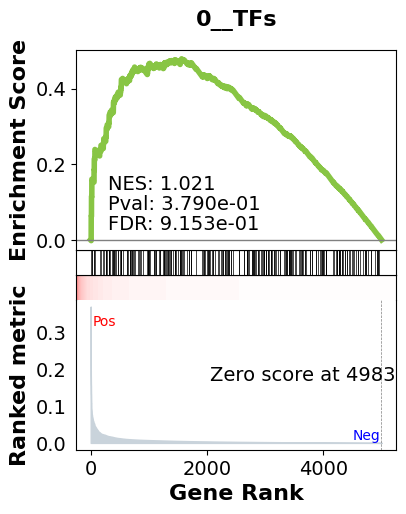

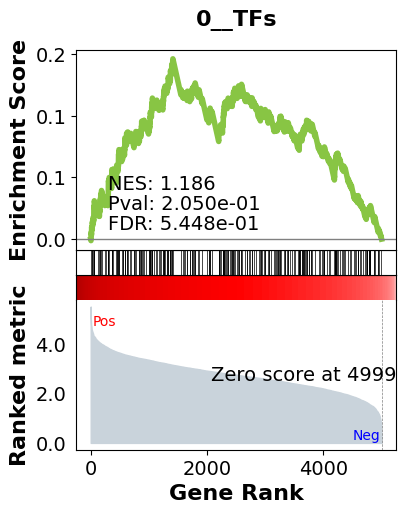

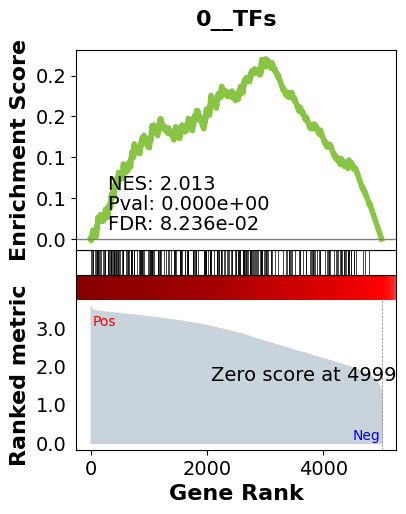

_________________________________________
TF specific enrichment
found some significant results for  26.666666666666668 % TFs

_________________________________________
loading GT,  omnipath
intersection of 2409 genes
intersection pct: 0.4818
precision:  0.0009638206117976746 
recall:  0.9998211731044349 
random precision: 0.0009639929996731526


 97%|█████████▋| 124/128 [00:03<00:00, 34.35it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:855: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:03<00:00, 33.42it/s]


Average Precision (AP):  0.0009828770798556434
Area Under Precision-Recall Curve (AUPRC):  0.0009826206684557387
EPR: 0.18521504061465777


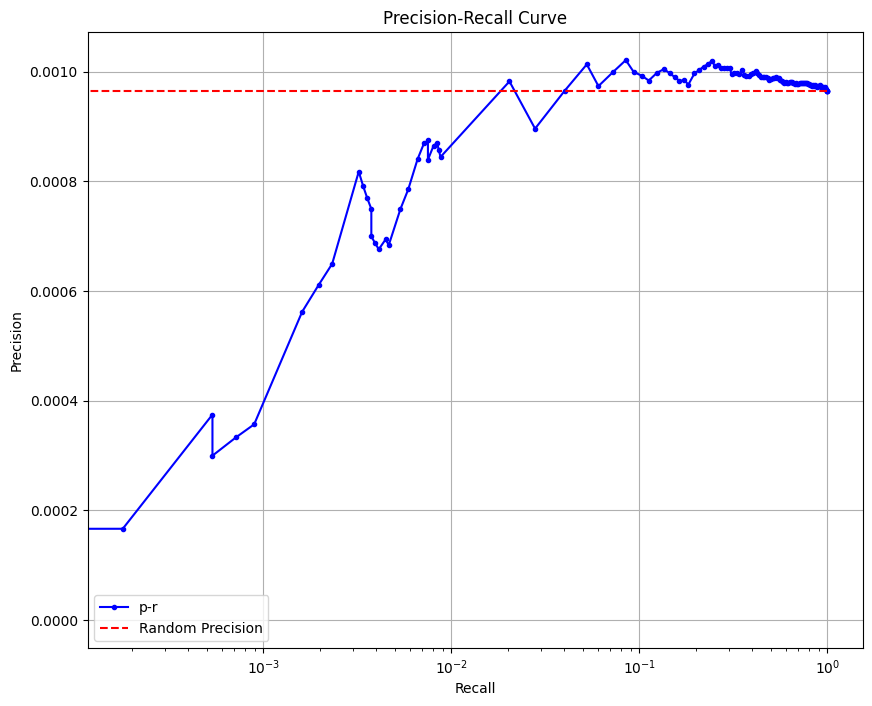

base enrichment
Top central genes: []


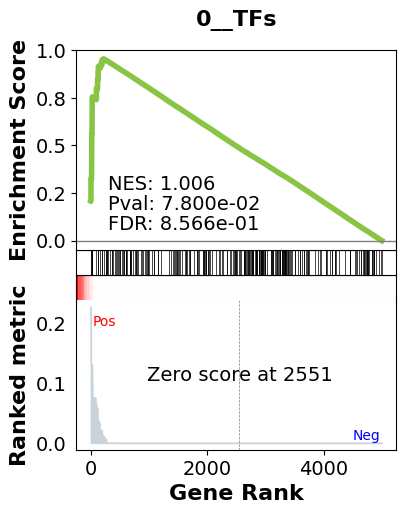

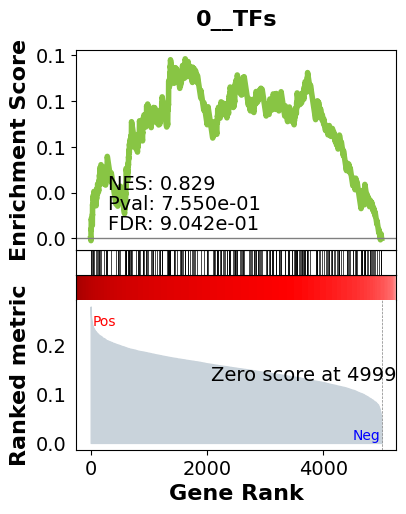

_________________________________________
TF specific enrichment
found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath
intersection of 2409 genes
intersection pct: 0.4818
precision:  0.0043363639060275275 
recall:  0.4182761087267525 
random precision: 0.0009639929996731526


 99%|█████████▉| 127/128 [00:03<00:00, 33.62it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:855: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:03<00:00, 33.92it/s]


Average Precision (AP):  0.0025039104636340784
Area Under Precision-Recall Curve (AUPRC):  0.002383534891456262
EPR: 4.4819782996432815


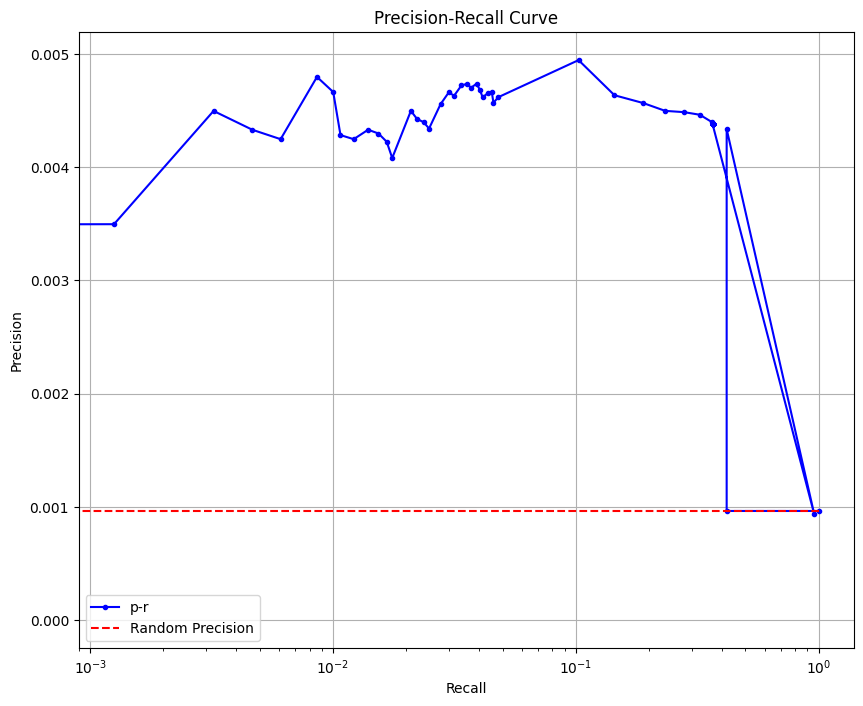

(34132, 70263)
Ys1
save dir exist


/home/ml4ig1/Documents code/scPRINT/notebooks/../tools/DeepSEM/src/DeepSEM_cell_type_test_specific_GRN_model.py:49: RuntimeWarning: Mean of empty slice.
  means.append(tmp[tmp != 0].mean())
/home/ml4ig1/Documents code/scPRINT/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/ml4ig1/Documents code/scPRINT/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ml4ig1/Documents code/scPRINT/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/ml4ig1/Documents code/scPRINT/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/ml4ig1/Documen

epoch: 1 0.3273043315857649 mse_loss: 0.27757468074560165 kl_loss: 0.0492863655090332 sparse_loss: 0.0004432937057572417
epoch: 2 0.39762153197079897 mse_loss: 0.345014245249331 kl_loss: 0.052104315254837275 sparse_loss: 0.0005029689873481402
epoch: 4 0.23391790129244328 mse_loss: 0.18967188009992242 kl_loss: 0.043716655345633626 sparse_loss: 0.000529362205270445
epoch: 5 0.24418429285287857 mse_loss: 0.19892204506322742 kl_loss: 0.04471553035546094 sparse_loss: 0.0005467138980748132
epoch: 7 0.18682100716978312 mse_loss: 0.14656796818599105 kl_loss: 0.039694206905551255 sparse_loss: 0.0005588277963397559
epoch: 8 0.2132576210424304 mse_loss: 0.1726830815896392 kl_loss: 0.04000719403848052 sparse_loss: 0.0005673420491802972
epoch: 10 0.1876241434365511 mse_loss: 0.14725925214588642 kl_loss: 0.03978997597005218 sparse_loss: 0.0005749113806814421
epoch: 11 0.18754844553768635 mse_loss: 0.1469433233141899 kl_loss: 0.04002377681899816 sparse_loss: 0.0005813401767227333
epoch: 13 0.15745914

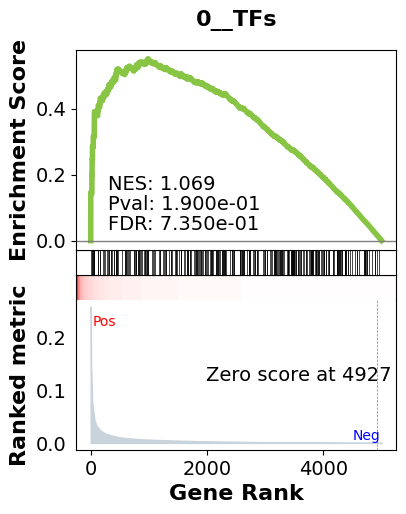

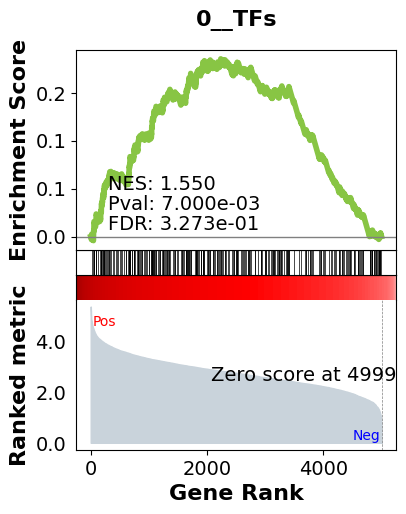

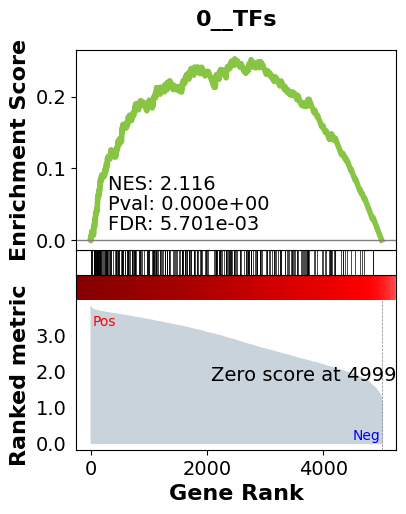

_________________________________________
TF specific enrichment
found some significant results for  31.03448275862069 % TFs

_________________________________________
loading GT,  omnipath
intersection of 2375 genes
intersection pct: 0.475
precision:  0.0019302088413958231 
recall:  0.9999081220139655 
random precision: 0.001930386201392276


 97%|█████████▋| 124/128 [00:03<00:00, 32.13it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:855: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:03<00:00, 33.87it/s]


Average Precision (AP):  0.002108149337038278
Area Under Precision-Recall Curve (AUPRC):  0.0021062790987022035
EPR: 1.1907666064657318


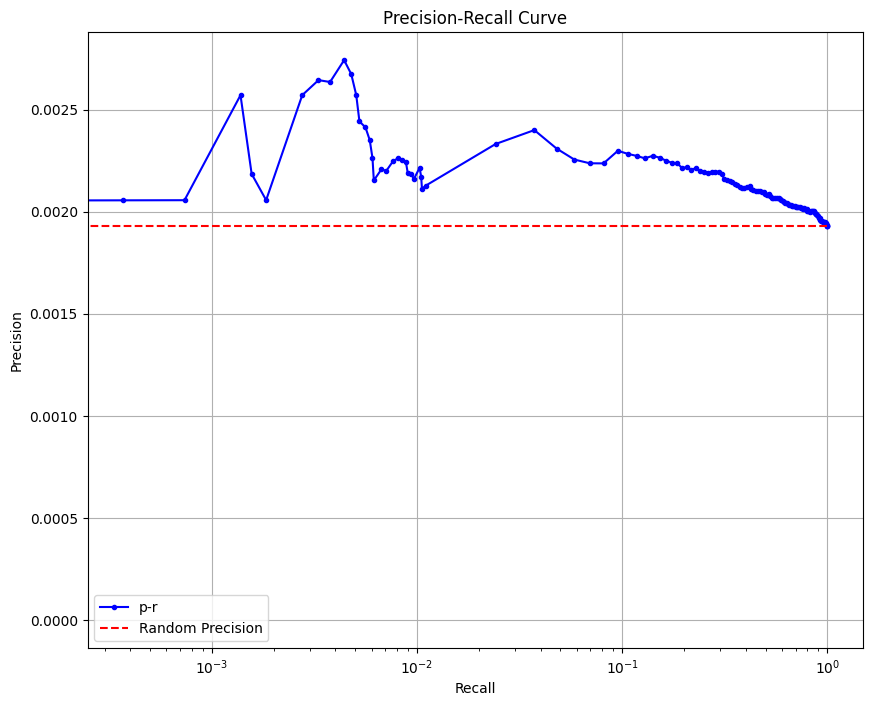

base enrichment
Top central genes: []


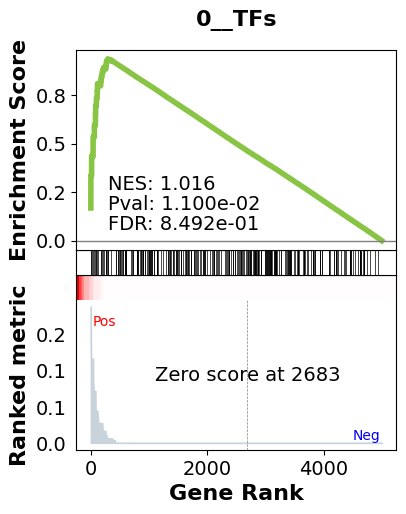

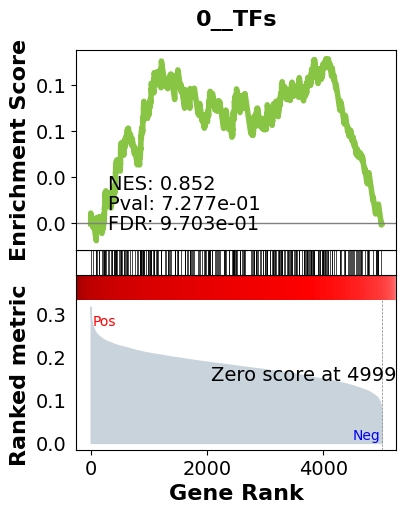

_________________________________________
TF specific enrichment
found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath
intersection of 2375 genes
intersection pct: 0.475
precision:  0.010744555921472517 
recall:  0.6187063579566336 
random precision: 0.001930386201392276


 97%|█████████▋| 124/128 [00:03<00:00, 33.18it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:855: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:03<00:00, 32.87it/s]


Average Precision (AP):  0.008129229919365499
Area Under Precision-Recall Curve (AUPRC):  0.007664319377254727
EPR: 6.015491286742859


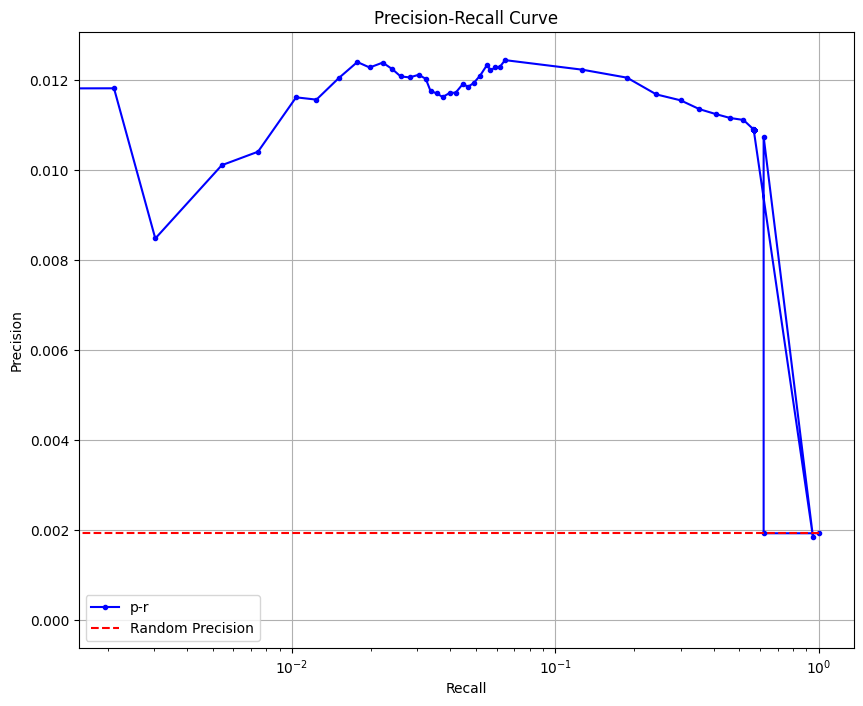

(34132, 70263)
xNW
save dir exist


/home/ml4ig1/Documents code/scPRINT/notebooks/../tools/DeepSEM/src/DeepSEM_cell_type_test_specific_GRN_model.py:49: RuntimeWarning: Mean of empty slice.
  means.append(tmp[tmp != 0].mean())
/home/ml4ig1/Documents code/scPRINT/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/ml4ig1/Documents code/scPRINT/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ml4ig1/Documents code/scPRINT/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/ml4ig1/Documents code/scPRINT/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/ml4ig1/Documen

epoch: 1 0.26054204534739256 mse_loss: 0.22599111683666706 kl_loss: 0.03414419881301001 sparse_loss: 0.00040673462717677467
epoch: 2 0.27415105793625116 mse_loss: 0.2364732064306736 kl_loss: 0.037201284896582365 sparse_loss: 0.00047656370770710055
epoch: 4 0.16084956843405962 mse_loss: 0.1264016516506672 kl_loss: 0.03393553028581664 sparse_loss: 0.0005123809023643844
epoch: 5 0.15070895059034228 mse_loss: 0.11531736794859171 kl_loss: 0.03485376061871648 sparse_loss: 0.0005378187852329575
epoch: 7 0.14496519835665822 mse_loss: 0.109924441203475 kl_loss: 0.03448696376290172 sparse_loss: 0.000553789552213857
epoch: 8 0.1335641243495047 mse_loss: 0.0983097804710269 kl_loss: 0.03469059243798256 sparse_loss: 0.0005637511058012024
epoch: 10 0.12089634779840708 mse_loss: 0.08603399991989136 kl_loss: 0.03429134644102305 sparse_loss: 0.0005710009245376568
epoch: 11 0.11333357449620962 mse_loss: 0.07832949818111956 kl_loss: 0.03442672733217478 sparse_loss: 0.00057735130758374
epoch: 13 0.10733363

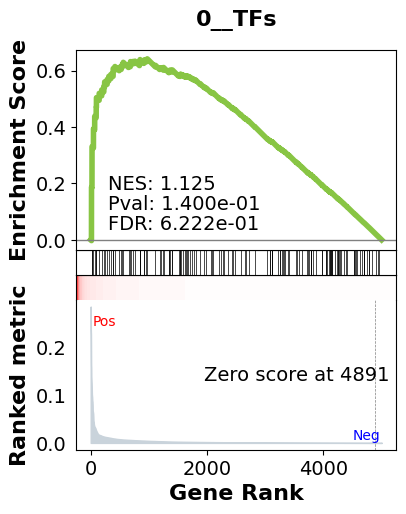

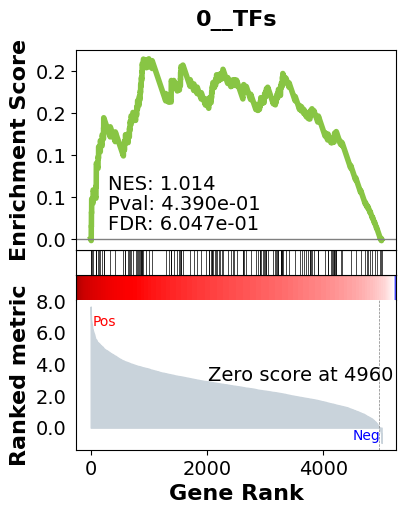

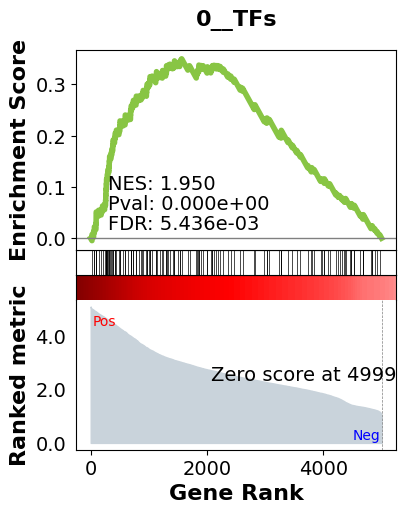

_________________________________________
TF specific enrichment
found some significant results for  57.142857142857146 % TFs

_________________________________________
loading GT,  omnipath
intersection of 1354 genes
intersection pct: 0.2708
precision:  0.001118457270244785 
recall:  1.0 
random precision: 0.001118457270244785


 92%|█████████▏| 118/128 [00:00<00:00, 125.03it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:855: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 122.59it/s]


Average Precision (AP):  0.0012876156665217696
Area Under Precision-Recall Curve (AUPRC):  0.0012817838674574302
EPR: 1.745767593383789


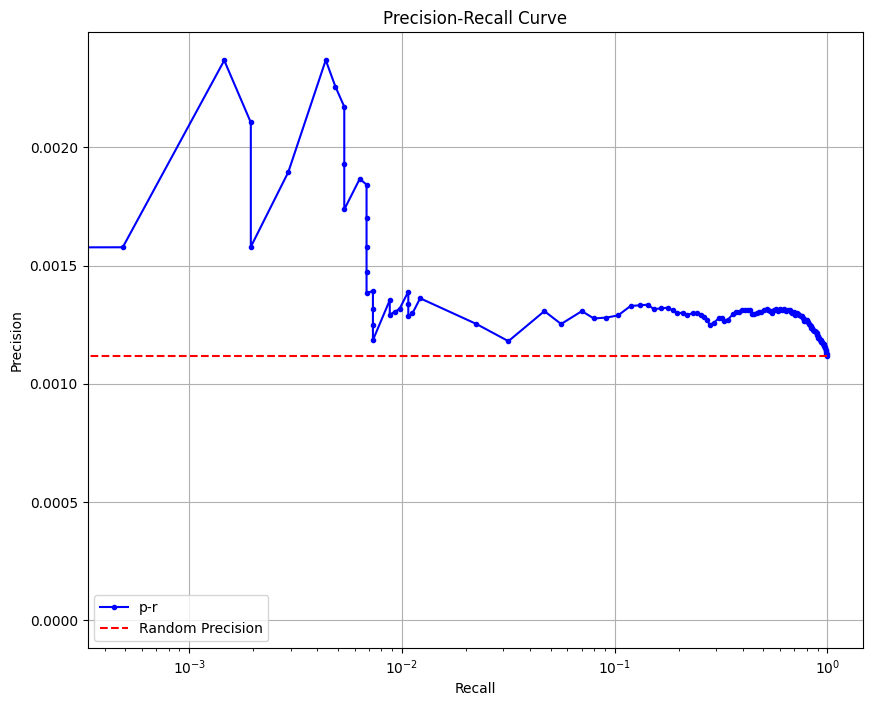

base enrichment
Top central genes: []


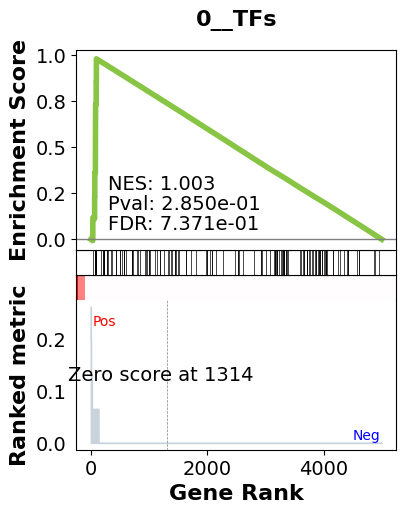

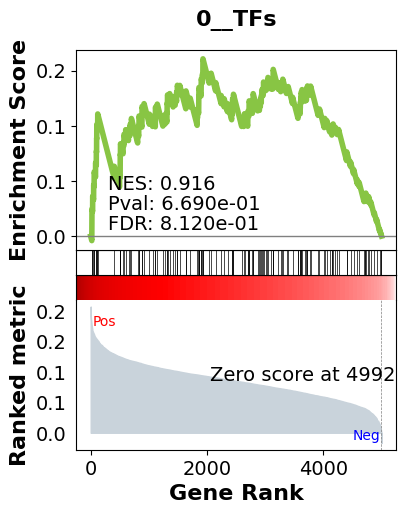

_________________________________________
TF specific enrichment
found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath
intersection of 1354 genes
intersection pct: 0.2708
precision:  0.005446824224519941 
recall:  0.4600389863547758 
random precision: 0.001118457270244785


 94%|█████████▍| 120/128 [00:00<00:00, 125.59it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:855: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 127.02it/s]


Average Precision (AP):  0.0038486577438927886
Area Under Precision-Recall Curve (AUPRC):  0.0036243253091286683
EPR: 6.617564019975085


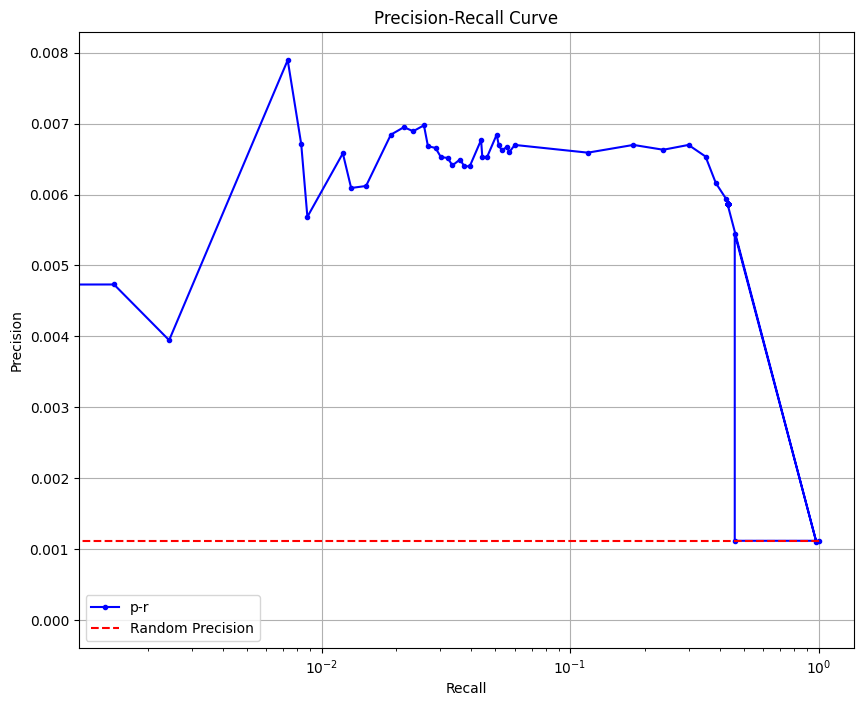

(34132, 70263)
KrU
save dir exist


/home/ml4ig1/Documents code/scPRINT/notebooks/../tools/DeepSEM/src/DeepSEM_cell_type_test_specific_GRN_model.py:49: RuntimeWarning: Mean of empty slice.
  means.append(tmp[tmp != 0].mean())
/home/ml4ig1/Documents code/scPRINT/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/ml4ig1/Documents code/scPRINT/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ml4ig1/Documents code/scPRINT/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/ml4ig1/Documents code/scPRINT/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/ml4ig1/Documen

epoch: 1 0.4279470071196556 mse_loss: 0.36905552819371223 kl_loss: 0.058440017339307815 sparse_loss: 0.00045146649063099176
epoch: 2 0.4519657362252474 mse_loss: 0.3855453236028552 kl_loss: 0.0659117114264518 sparse_loss: 0.0005087057215860114
epoch: 4 0.3526032827794552 mse_loss: 0.3007556749507785 kl_loss: 0.05131422448903322 sparse_loss: 0.000533382517460268
epoch: 5 0.34388093929737806 mse_loss: 0.29026822093874216 kl_loss: 0.053055937052704394 sparse_loss: 0.0005567816406255588
epoch: 7 0.2915581427514553 mse_loss: 0.24448794033378363 kl_loss: 0.046500270371325314 sparse_loss: 0.000569931224163156
epoch: 8 0.2796876011416316 mse_loss: 0.23175226524472237 kl_loss: 0.04735505720600486 sparse_loss: 0.0005802830564789474
epoch: 10 0.4212526399642229 mse_loss: 0.38398608565330505 kl_loss: 0.0366767380037345 sparse_loss: 0.0005898309791518841
epoch: 11 0.41477792151272297 mse_loss: 0.37700212001800537 kl_loss: 0.03717808285728097 sparse_loss: 0.0005977261644147802
epoch: 13 0.2324747638

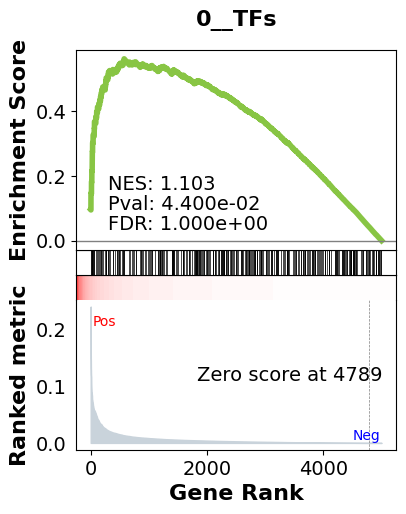

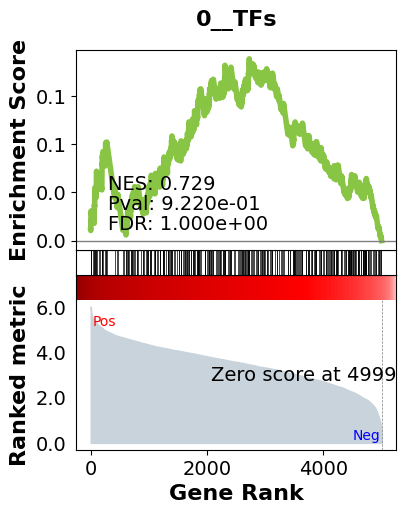

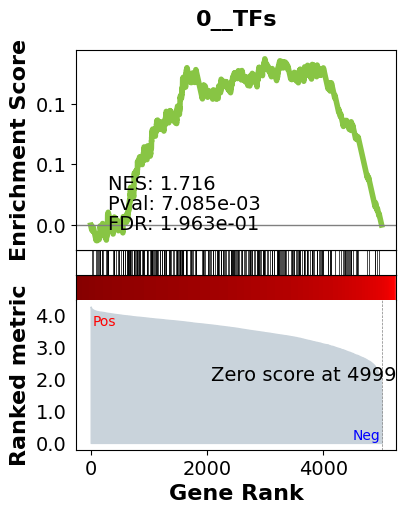

_________________________________________
TF specific enrichment
found some significant results for  12.121212121212121 % TFs

_________________________________________
loading GT,  omnipath
intersection of 2860 genes
intersection pct: 0.572
precision:  0.0008691727999178157 
recall:  0.999718666479111 
random precision: 0.0008694173961750038


 98%|█████████▊| 126/128 [00:05<00:00, 23.58it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:855: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:05<00:00, 24.03it/s]


Average Precision (AP):  0.0008730554944666313
Area Under Precision-Recall Curve (AUPRC):  0.0008726498428348439
EPR: 1.6196849416085282


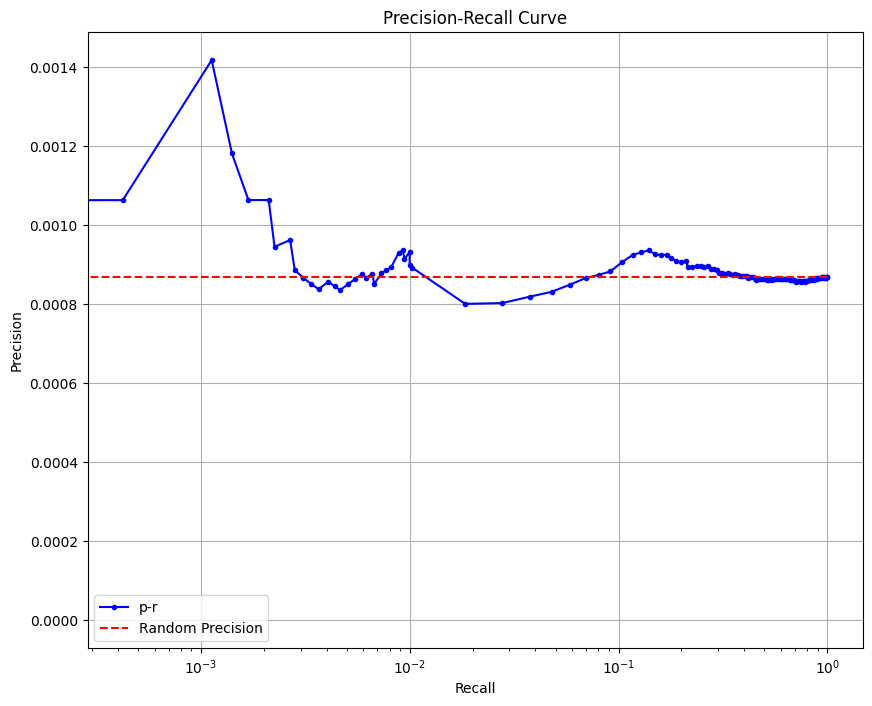

base enrichment
PowerIterationFailedConvergence


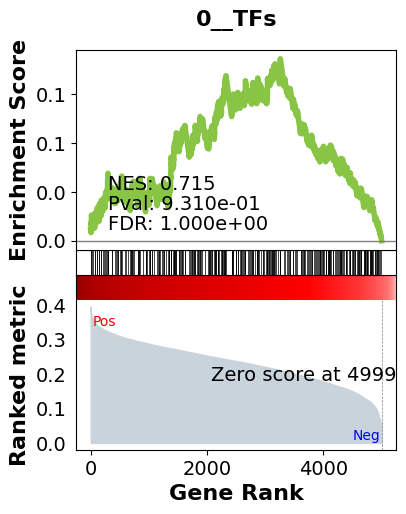

_________________________________________
TF specific enrichment
found some significant results for  9.090909090909092 % TFs

_________________________________________
loading GT,  omnipath
intersection of 2860 genes
intersection pct: 0.572
precision:  0.003505586537290087 
recall:  0.37642425094950066 
random precision: 0.0008694173961750038


 98%|█████████▊| 126/128 [00:04<00:00, 26.05it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:855: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:05<00:00, 25.25it/s]


Average Precision (AP):  0.0019749305902889702
Area Under Precision-Recall Curve (AUPRC):  0.0018431375899786526
EPR: 4.558213858038006


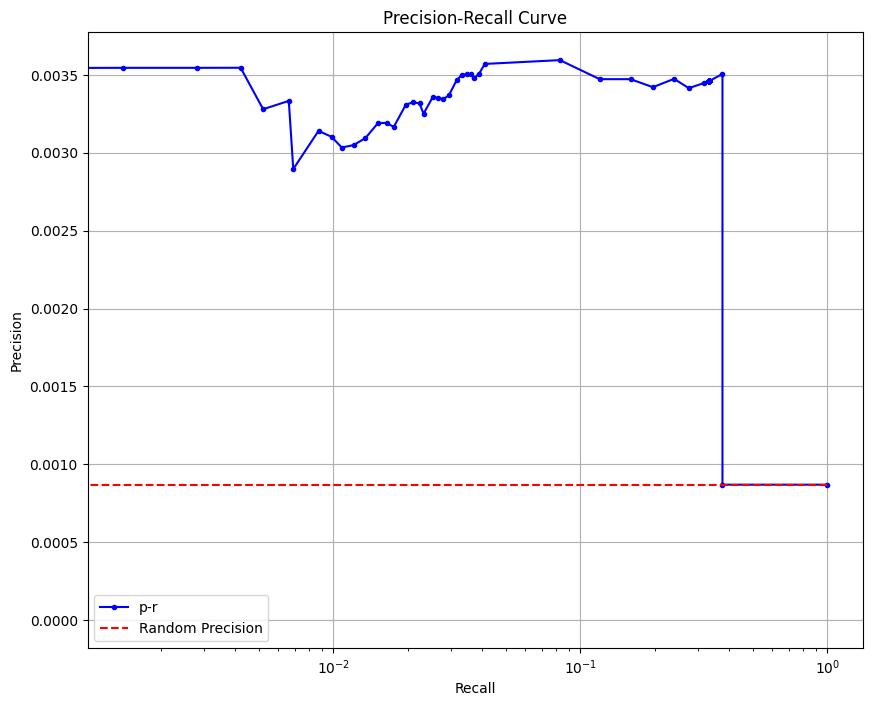

(34132, 70263)
tpF
save dir exist


/home/ml4ig1/Documents code/scPRINT/notebooks/../tools/DeepSEM/src/DeepSEM_cell_type_test_specific_GRN_model.py:49: RuntimeWarning: Mean of empty slice.
  means.append(tmp[tmp != 0].mean())
/home/ml4ig1/Documents code/scPRINT/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/ml4ig1/Documents code/scPRINT/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ml4ig1/Documents code/scPRINT/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/ml4ig1/Documents code/scPRINT/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/ml4ig1/Documen

epoch: 1 0.42825757525861263 mse_loss: 0.37584293726831675 kl_loss: 0.05199090769747272 sparse_loss: 0.0004237365628796397
epoch: 2 0.3931190865114331 mse_loss: 0.3353505013510585 kl_loss: 0.05728792096488178 sparse_loss: 0.0004806738052138826
epoch: 4 0.31863793451339006 mse_loss: 0.2697033351287246 kl_loss: 0.048432879615575075 sparse_loss: 0.000501716987855616
epoch: 5 0.3248842703178525 mse_loss: 0.2745063132606447 kl_loss: 0.0498587463516742 sparse_loss: 0.0005192147182242479
epoch: 7 0.27187141217291355 mse_loss: 0.23040419537574053 kl_loss: 0.04093659215141088 sparse_loss: 0.0005306191196723375
epoch: 8 0.25233373045921326 mse_loss: 0.21030523162335157 kl_loss: 0.041488641407340765 sparse_loss: 0.0005398546782089397
epoch: 10 0.23978359252214432 mse_loss: 0.19598153978586197 kl_loss: 0.04325387941207737 sparse_loss: 0.0005481738444359507
epoch: 11 0.23057891800999641 mse_loss: 0.18634036229923368 kl_loss: 0.04368246148806065 sparse_loss: 0.000556089602469001
epoch: 13 0.24448924

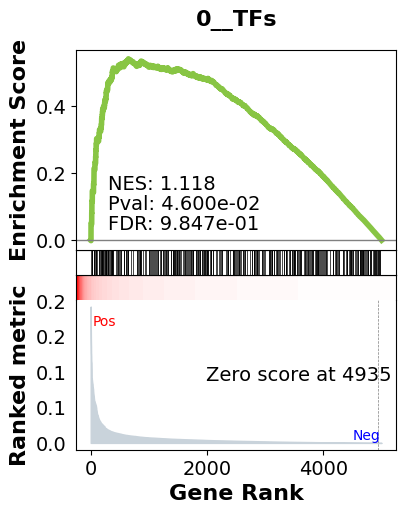

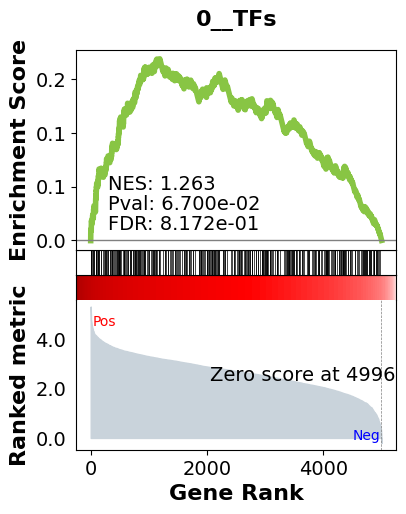

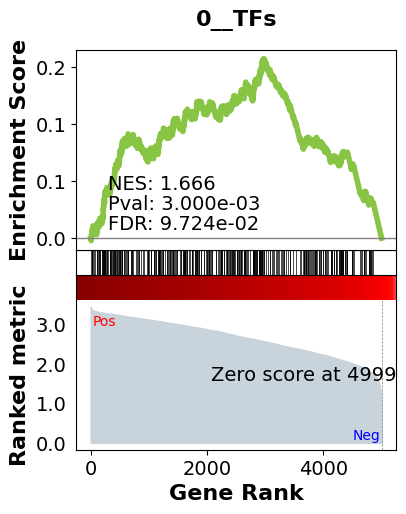

_________________________________________
TF specific enrichment
found some significant results for  29.41176470588235 % TFs

_________________________________________
loading GT,  omnipath
intersection of 2649 genes
intersection pct: 0.5298
precision:  0.0008096026660006227 
recall:  0.9998239436619718 
random precision: 0.0008097452267799854


 98%|█████████▊| 125/128 [00:04<00:00, 27.67it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:855: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:04<00:00, 28.32it/s]


Average Precision (AP):  0.0008238963206526504
Area Under Precision-Recall Curve (AUPRC):  0.0008234066879560858
EPR: 0.43444557334991246


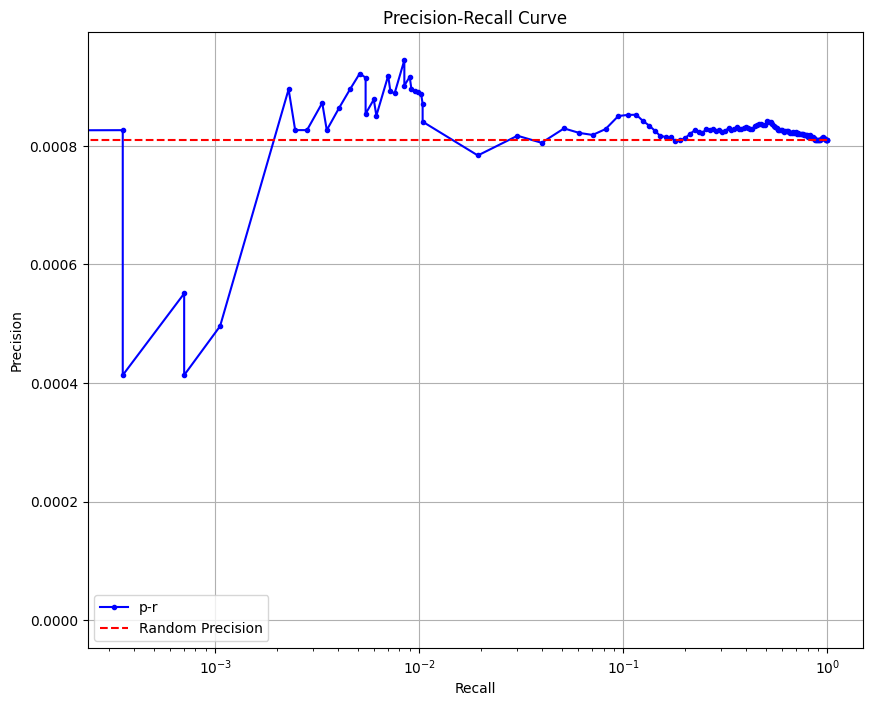

base enrichment
Top central genes: []


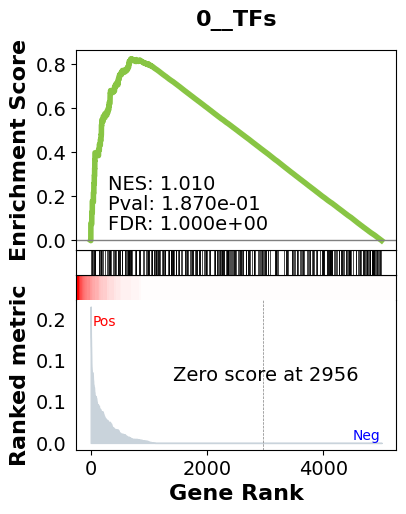

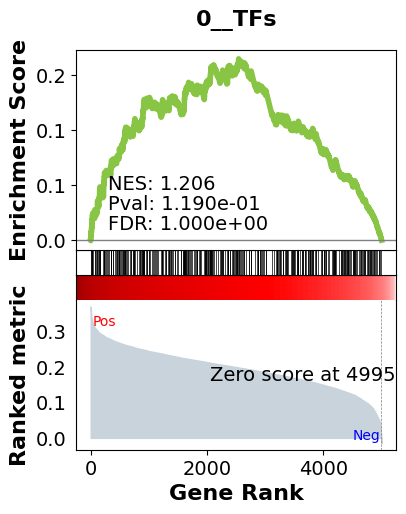

_________________________________________
TF specific enrichment
found some significant results for  2.9411764705882355 % TFs

_________________________________________
loading GT,  omnipath
intersection of 2649 genes
intersection pct: 0.5298
precision:  0.002611099478527913 
recall:  0.36883802816901406 
random precision: 0.0008097452267799854


 98%|█████████▊| 126/128 [00:03<00:00, 28.44it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:855: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:03<00:00, 32.44it/s]


Average Precision (AP):  0.0015664179216817815
Area Under Precision-Recall Curve (AUPRC):  0.0014682578922718377
EPR: 3.492774266653899


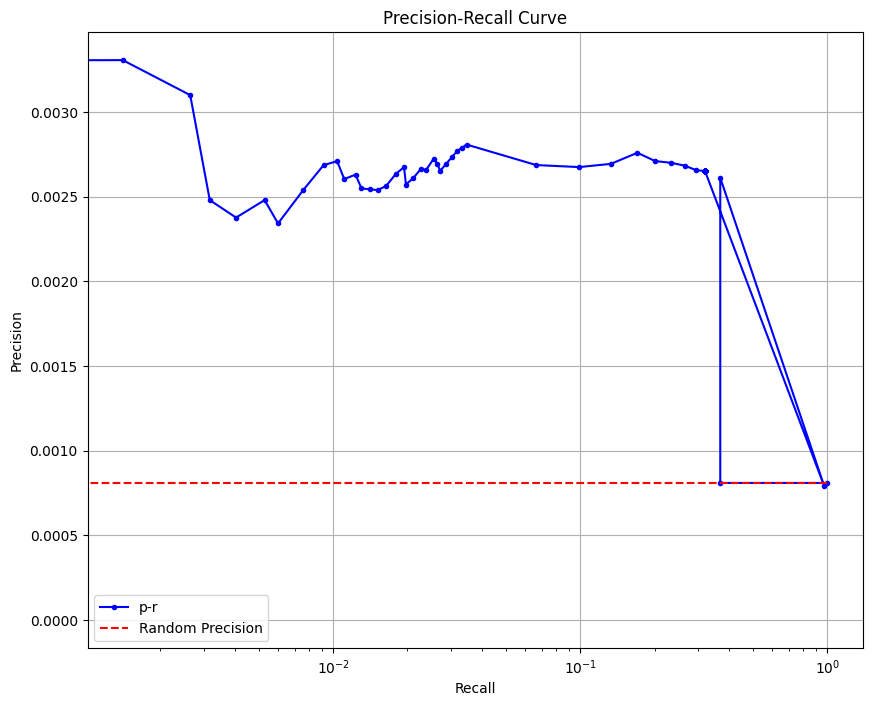

(34132, 70263)
WFP
save dir exist


/home/ml4ig1/Documents code/scPRINT/notebooks/../tools/DeepSEM/src/DeepSEM_cell_type_test_specific_GRN_model.py:55: RuntimeWarning: divide by zero encountered in divide
  data_values = (data_values - means) / (stds)
/home/ml4ig1/Documents code/scPRINT/notebooks/../tools/DeepSEM/src/DeepSEM_cell_type_test_specific_GRN_model.py:55: RuntimeWarning: invalid value encountered in divide
  data_values = (data_values - means) / (stds)


epoch: 1 0.9560084342956543 mse_loss: 0.9325240969657898 kl_loss: 0.02317627577285748 sparse_loss: 0.0003080573747865856
epoch: 2 0.946094012260437 mse_loss: 0.9225921154022216 kl_loss: 0.02315903435810469 sparse_loss: 0.00034282577107660475
epoch: 4 0.7125839591026306 mse_loss: 0.6866811990737915 kl_loss: 0.025517048640176655 sparse_loss: 0.00038569949101656674
epoch: 5 0.7461410522460937 mse_loss: 0.7200007915496827 kl_loss: 0.025712147122249007 sparse_loss: 0.00042810345767065885
epoch: 7 0.3320397615432739 mse_loss: 0.29970217645168307 kl_loss: 0.03187259454280138 sparse_loss: 0.0004649939539376646
epoch: 8 0.2973847508430481 mse_loss: 0.26213679313659666 kl_loss: 0.03474860973656178 sparse_loss: 0.0004993578069843352
epoch: 10 0.2002592921257019 mse_loss: 0.16188714504241944 kl_loss: 0.037849617376923564 sparse_loss: 0.0005225273664109409
epoch: 11 0.2289809077978134 mse_loss: 0.18891465067863464 kl_loss: 0.03952433839440346 sparse_loss: 0.0005419133580289781
epoch: 13 0.206312260

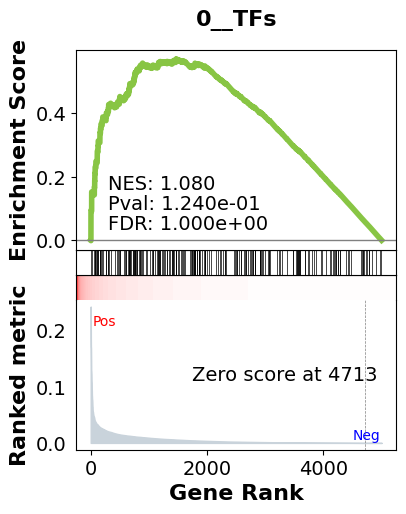

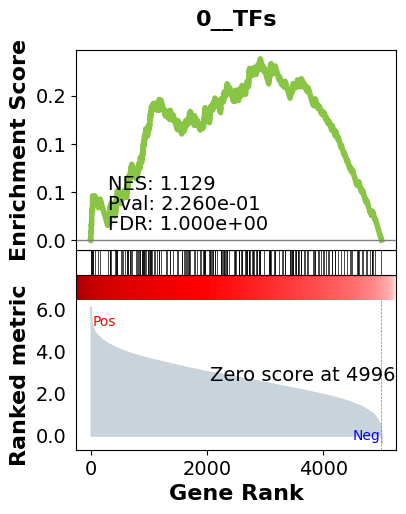

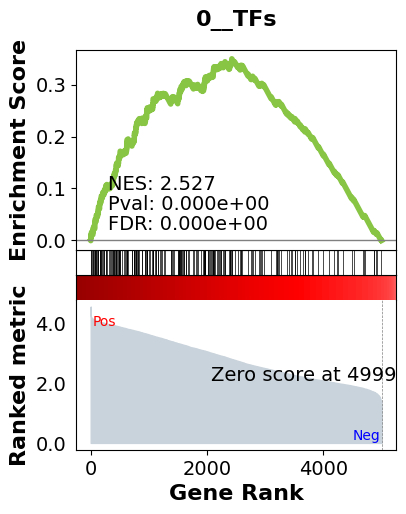

_________________________________________
TF specific enrichment
found some significant results for  62.5 % TFs

_________________________________________
loading GT,  omnipath
intersection of 2019 genes
intersection pct: 0.4038
precision:  0.0018245890992950517 
recall:  0.99959661153691 
random precision: 0.0018253254145086494


 97%|█████████▋| 124/128 [00:02<00:00, 47.36it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:855: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 45.81it/s]


Average Precision (AP):  0.002001517313892669
Area Under Precision-Recall Curve (AUPRC):  0.0019980066864443272
EPR: 1.401687169310679


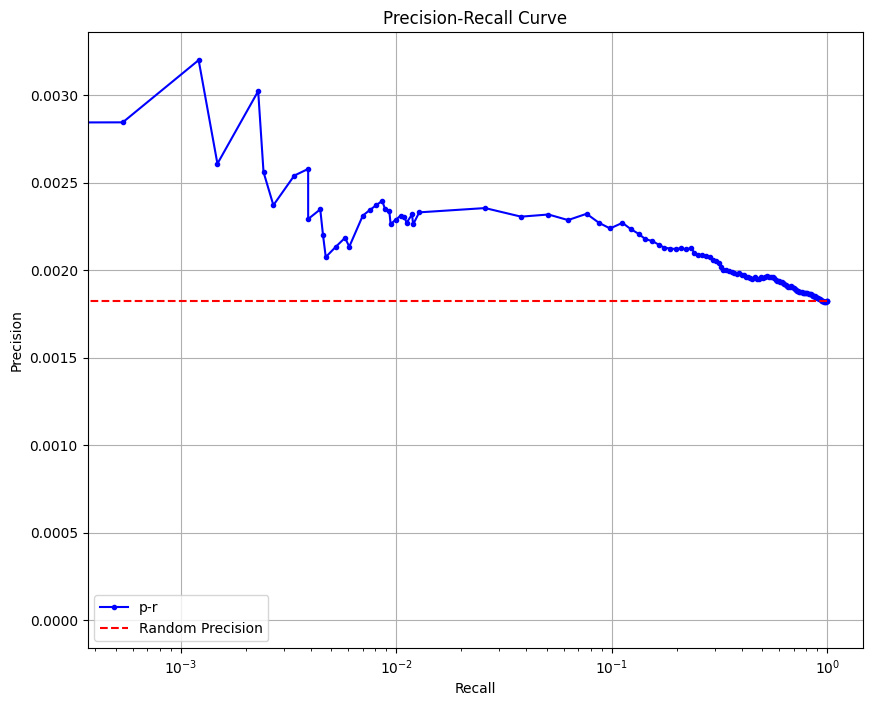

base enrichment
Top central genes: []


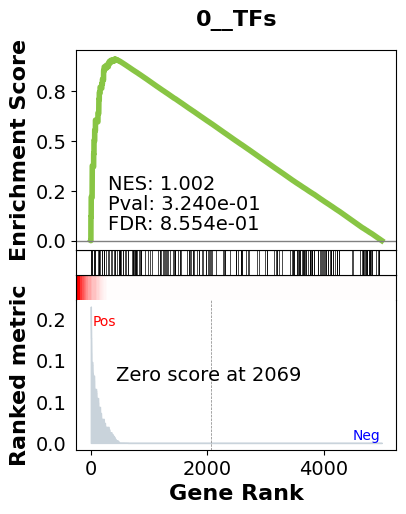

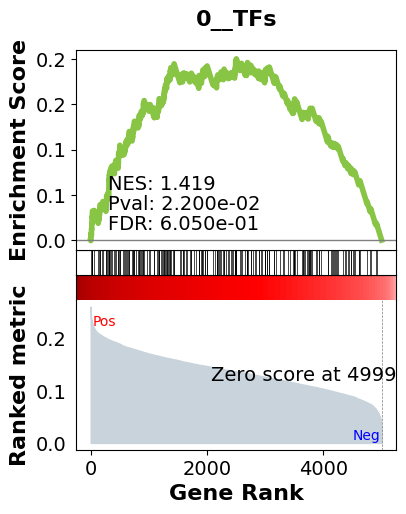

_________________________________________
TF specific enrichment
found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath
intersection of 2019 genes
intersection pct: 0.4038
precision:  0.0085371552401444 
recall:  0.4470888799247008 
random precision: 0.0018253254145086494


 96%|█████████▌| 123/128 [00:02<00:00, 48.50it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:855: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 47.64it/s]


Average Precision (AP):  0.0051594881821142875
Area Under Precision-Recall Curve (AUPRC):  0.004612014160405986
EPR: 4.779335028159552


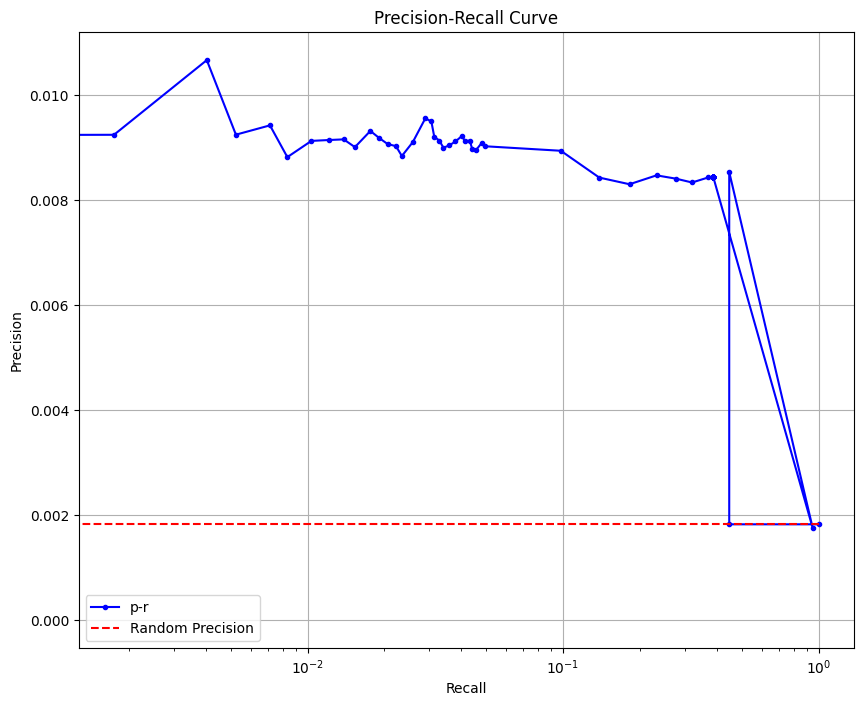

(34132, 70263)
M8P
save dir exist


/home/ml4ig1/Documents code/scPRINT/notebooks/../tools/DeepSEM/src/DeepSEM_cell_type_test_specific_GRN_model.py:49: RuntimeWarning: Mean of empty slice.
  means.append(tmp[tmp != 0].mean())
/home/ml4ig1/Documents code/scPRINT/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/ml4ig1/Documents code/scPRINT/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ml4ig1/Documents code/scPRINT/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/ml4ig1/Documents code/scPRINT/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/ml4ig1/Documen

epoch: 1 0.27787179686129093 mse_loss: 0.24111705645918846 kl_loss: 0.036326449597254395 sparse_loss: 0.0004282918707758654
epoch: 2 0.2720985170453787 mse_loss: 0.23114113230258226 kl_loss: 0.040460069314576685 sparse_loss: 0.0004973190843884367
epoch: 4 0.18044944945722818 mse_loss: 0.14408632460981607 kl_loss: 0.03582864929921925 sparse_loss: 0.0005344718447304331
epoch: 5 0.17125930543988943 mse_loss: 0.13380990037694573 kl_loss: 0.036886291520204395 sparse_loss: 0.0005631085114146117
epoch: 7 0.15691368887200952 mse_loss: 0.12075272807851434 kl_loss: 0.0355803701095283 sparse_loss: 0.000580586744035827
epoch: 8 0.14988202136009932 mse_loss: 0.11340175103396177 kl_loss: 0.03588812303496525 sparse_loss: 0.0005921446390857454
epoch: 10 0.13686461234465241 mse_loss: 0.09983038017526269 kl_loss: 0.036433578992728144 sparse_loss: 0.0006006498042552266
epoch: 11 0.1414626780897379 mse_loss: 0.10428437916561961 kl_loss: 0.036570565891452134 sparse_loss: 0.0006077299949538428
epoch: 13 0.1

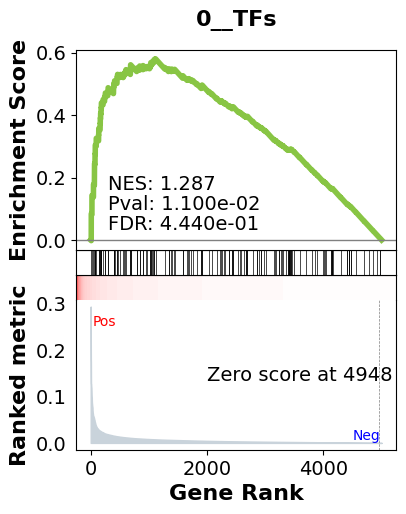

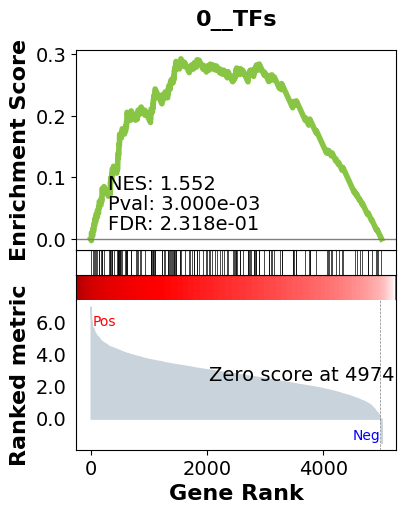

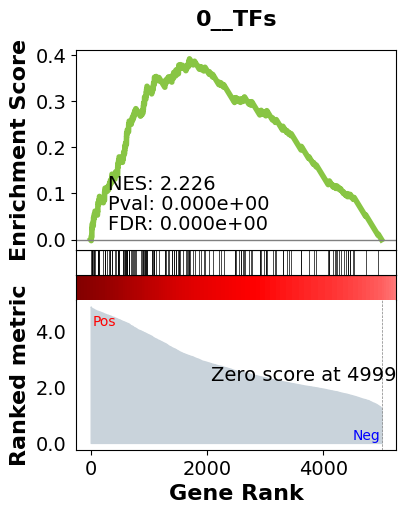

_________________________________________
TF specific enrichment
found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath
intersection of 1567 genes
intersection pct: 0.3134
precision:  0.0012339971087350064 
recall:  0.999340804218853 
random precision: 0.001234811090996705


 98%|█████████▊| 126/128 [00:01<00:00, 89.70it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:855: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 89.42it/s]


Average Precision (AP):  0.0013701001853955745
Area Under Precision-Recall Curve (AUPRC):  0.0013640817749529081
EPR: 1.6039165062673524


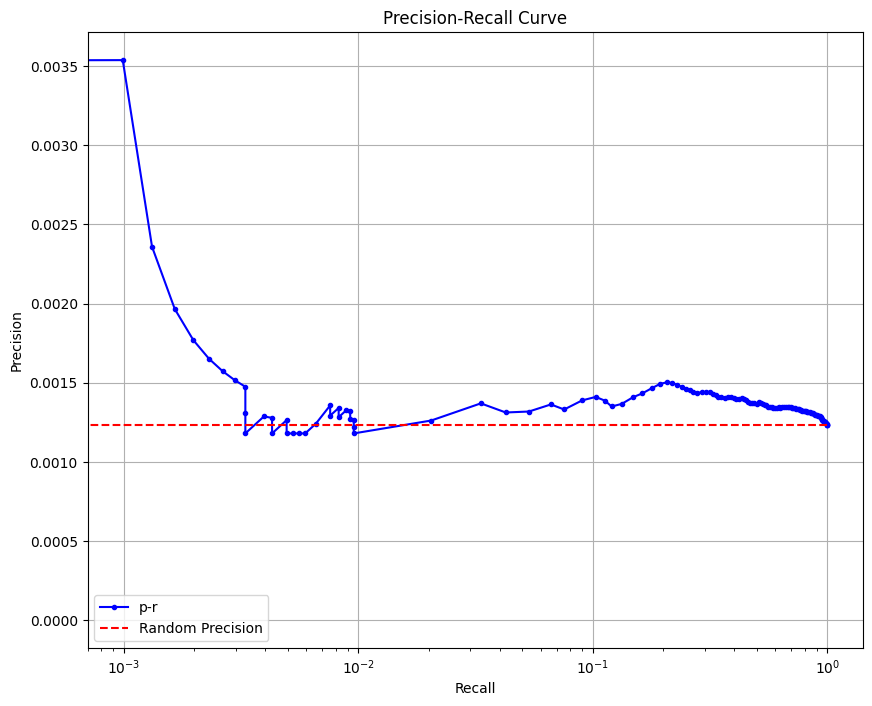

base enrichment
Top central genes: []


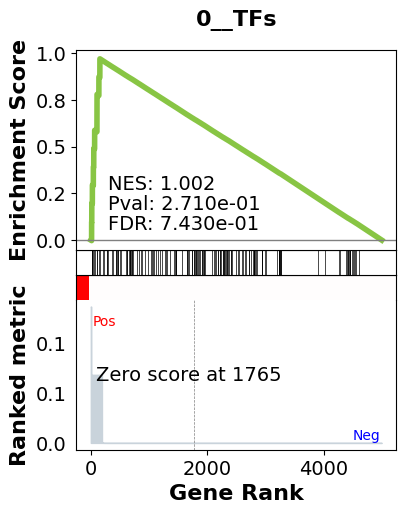

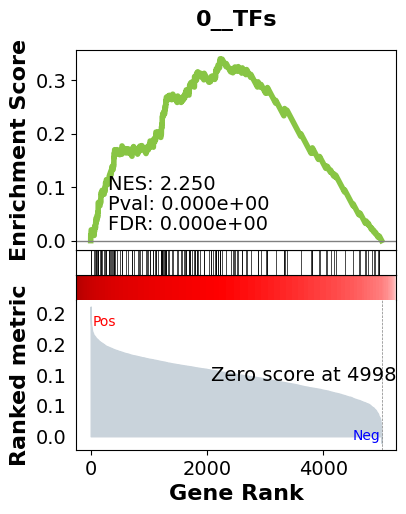

_________________________________________
TF specific enrichment
found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath
intersection of 1567 genes
intersection pct: 0.3134
precision:  0.008659368710421679 
recall:  0.5814106789716545 
random precision: 0.001234811090996705


 93%|█████████▎| 119/128 [00:01<00:00, 87.98it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:855: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 89.71it/s]


Average Precision (AP):  0.006444900017847056
Area Under Precision-Recall Curve (AUPRC):  0.005954581852587772
EPR: 6.218012422291738


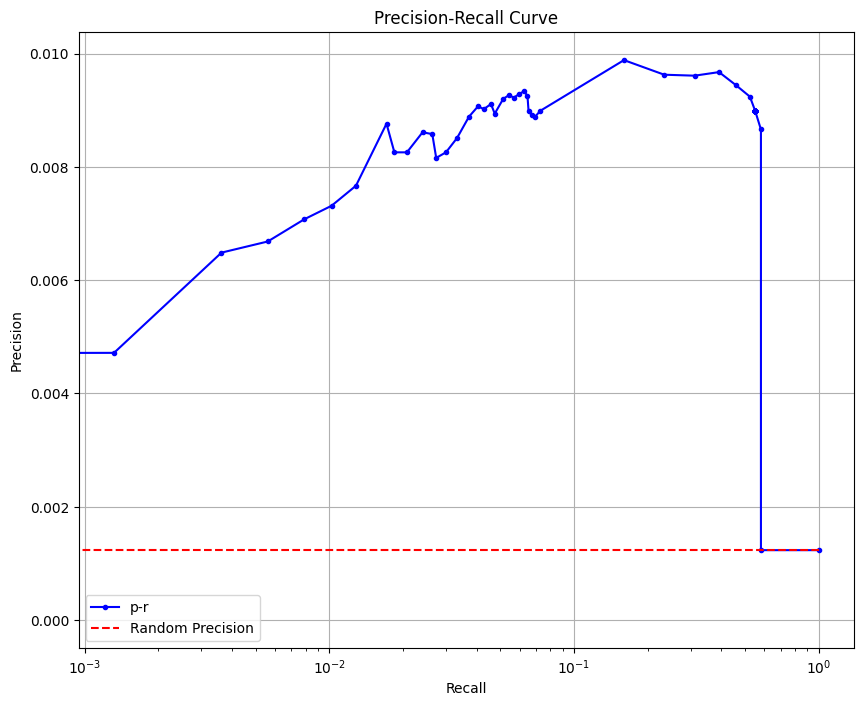

(34132, 70263)
EZj
save dir exist


/home/ml4ig1/Documents code/scPRINT/notebooks/../tools/DeepSEM/src/DeepSEM_cell_type_test_specific_GRN_model.py:49: RuntimeWarning: Mean of empty slice.
  means.append(tmp[tmp != 0].mean())
/home/ml4ig1/Documents code/scPRINT/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/ml4ig1/Documents code/scPRINT/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ml4ig1/Documents code/scPRINT/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/ml4ig1/Documents code/scPRINT/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/ml4ig1/Documen

epoch: 1 0.40059647522866726 mse_loss: 0.35031506046652794 kl_loss: 0.049837157188449055 sparse_loss: 0.0004442562840267783
epoch: 2 0.3862885572016239 mse_loss: 0.3324888413771987 kl_loss: 0.05330421612598002 sparse_loss: 0.0004955003805662272
epoch: 4 0.2818433362990618 mse_loss: 0.2390298042446375 kl_loss: 0.042294947896152735 sparse_loss: 0.0005185898116906174
epoch: 5 0.28251815866678953 mse_loss: 0.23861861508339643 kl_loss: 0.043363245436921716 sparse_loss: 0.0005363010241126176
epoch: 7 0.2902707848697901 mse_loss: 0.24619083432480693 kl_loss: 0.04352997231762856 sparse_loss: 0.0005499838189280126
epoch: 8 0.260935683734715 mse_loss: 0.21639181533828378 kl_loss: 0.043985208380036056 sparse_loss: 0.0005586583829426672
epoch: 10 0.2143000354990363 mse_loss: 0.17218748619779944 kl_loss: 0.041546560009010136 sparse_loss: 0.0005659857015416492
epoch: 11 0.34018696937710047 mse_loss: 0.2978317248634994 kl_loss: 0.041781865642406046 sparse_loss: 0.0005733760772272944
epoch: 13 0.19263

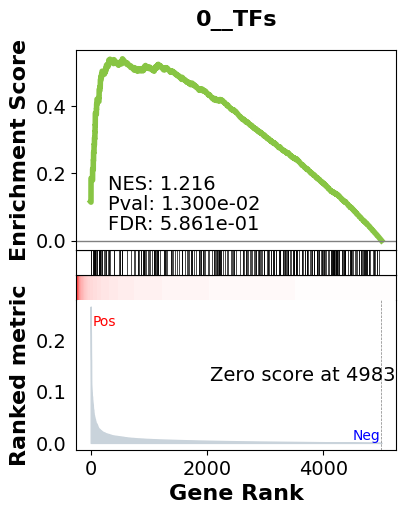

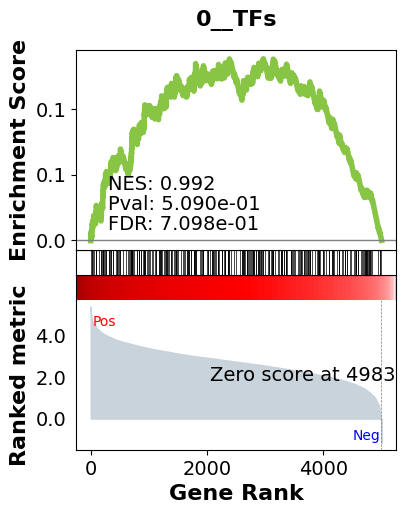

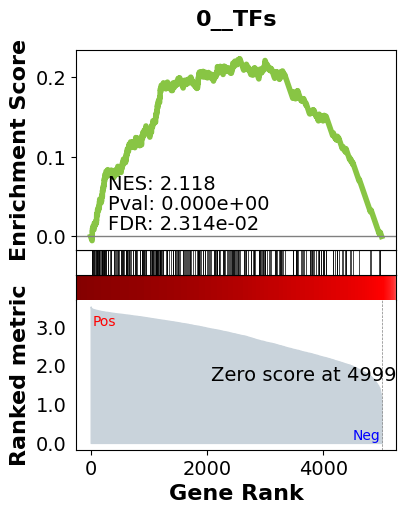

_________________________________________
TF specific enrichment
found some significant results for  23.529411764705884 % TFs

_________________________________________
loading GT,  omnipath
intersection of 2716 genes
intersection pct: 0.5432
precision:  0.0020580585141728846 
recall:  0.9998682303333772 
random precision: 0.0020583297395964707


 98%|█████████▊| 126/128 [00:05<00:00, 24.77it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:855: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:05<00:00, 25.02it/s]


Average Precision (AP):  0.0021242862060859066
Area Under Precision-Recall Curve (AUPRC):  0.002120373844894878
EPR: 1.0565386844306075


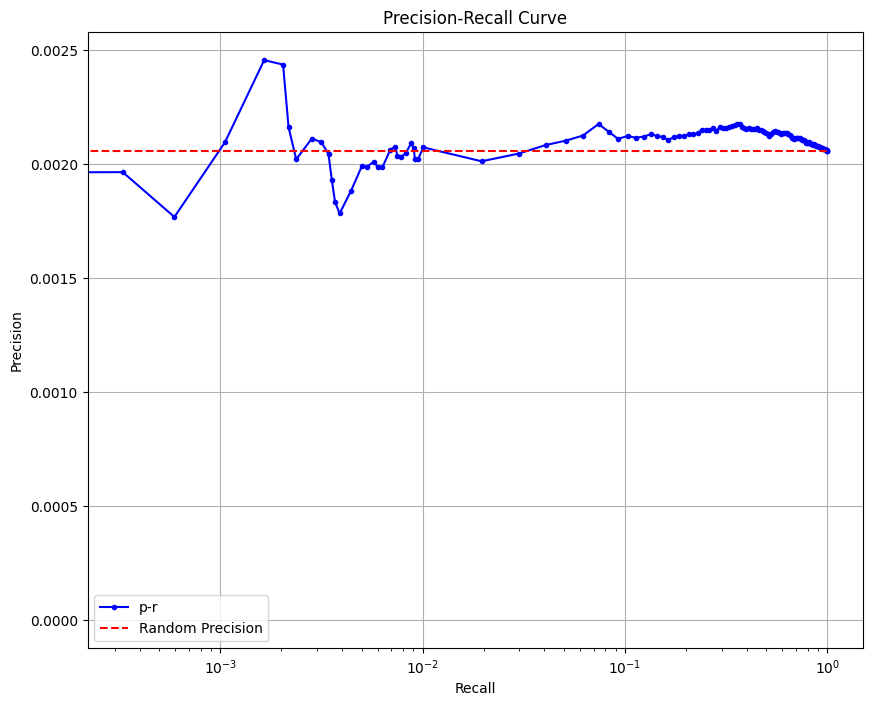

base enrichment
Top central genes: []


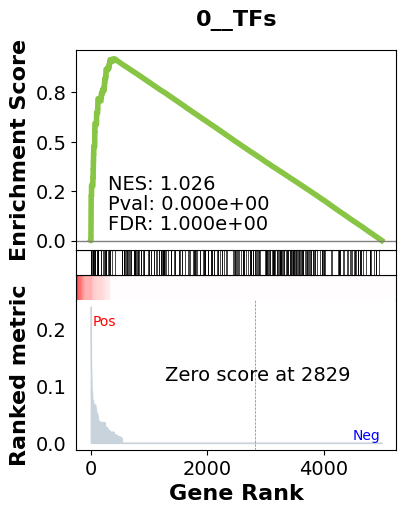

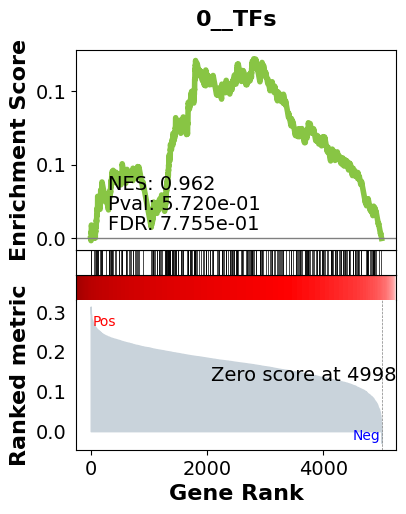

_________________________________________
TF specific enrichment
found some significant results for  2.9411764705882355 % TFs

_________________________________________
loading GT,  omnipath
intersection of 2716 genes
intersection pct: 0.5432
precision:  0.011220581335910201 
recall:  0.5278692844907102 
random precision: 0.0020583297395964707


 98%|█████████▊| 125/128 [00:04<00:00, 25.98it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:855: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:04<00:00, 26.27it/s]


Average Precision (AP):  0.007392988286856336
Area Under Precision-Recall Curve (AUPRC):  0.006982278824583029
EPR: 6.07733062400267


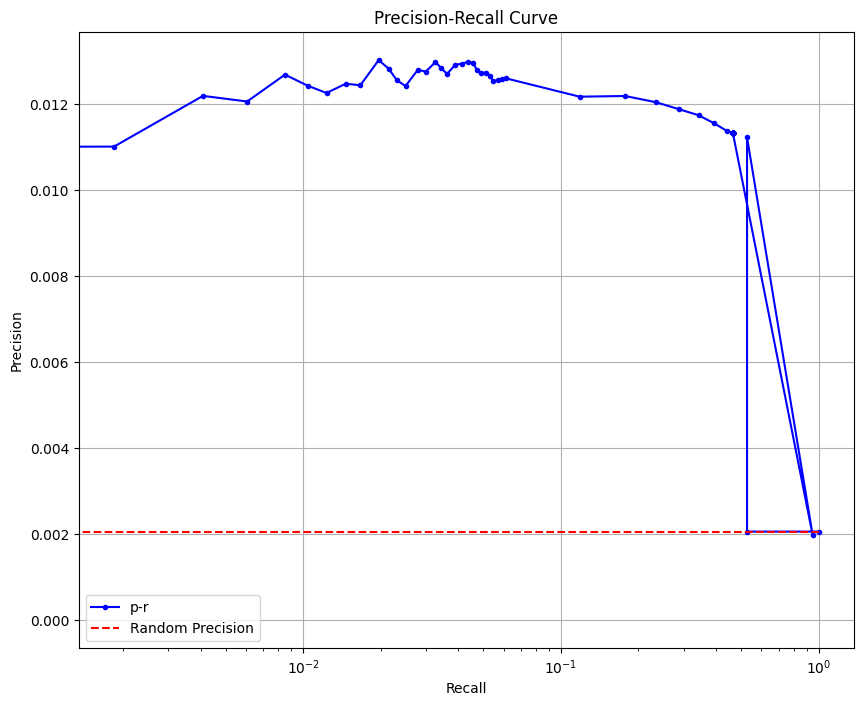

(34132, 70263)
1zV
save dir exist


/home/ml4ig1/Documents code/scPRINT/notebooks/../tools/DeepSEM/src/DeepSEM_cell_type_test_specific_GRN_model.py:55: RuntimeWarning: divide by zero encountered in divide
  data_values = (data_values - means) / (stds)
/home/ml4ig1/Documents code/scPRINT/notebooks/../tools/DeepSEM/src/DeepSEM_cell_type_test_specific_GRN_model.py:55: RuntimeWarning: invalid value encountered in divide
  data_values = (data_values - means) / (stds)


epoch: 1 0.6856154998143514 mse_loss: 0.6590306758880615 kl_loss: 0.02627510150584082 sparse_loss: 0.0003097054044095178
epoch: 2 0.683865507443746 mse_loss: 0.657547394434611 kl_loss: 0.02596868248656392 sparse_loss: 0.00034942028772396344
epoch: 4 0.47636260588963825 mse_loss: 0.4474713404973348 kl_loss: 0.028510714725901682 sparse_loss: 0.0003805596206802875
epoch: 5 0.45856498678525287 mse_loss: 0.42834686239560443 kl_loss: 0.029803410017242033 sparse_loss: 0.00041472115359889966
epoch: 7 0.3052487373352051 mse_loss: 0.27150797843933105 kl_loss: 0.03329508410145839 sparse_loss: 0.0004456690900648634
epoch: 8 0.29220785697301227 mse_loss: 0.2560655822356542 kl_loss: 0.0356644227479895 sparse_loss: 0.0004778537355984251
epoch: 10 0.22424944241841635 mse_loss: 0.18537443379561105 kl_loss: 0.03837125593175491 sparse_loss: 0.0005037472195302447
epoch: 11 0.2533667981624603 mse_loss: 0.2127502759297689 kl_loss: 0.04008988477289677 sparse_loss: 0.0005266308047187825
epoch: 13 0.2283797462

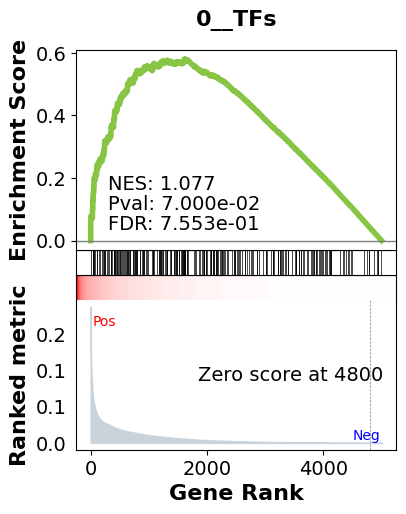

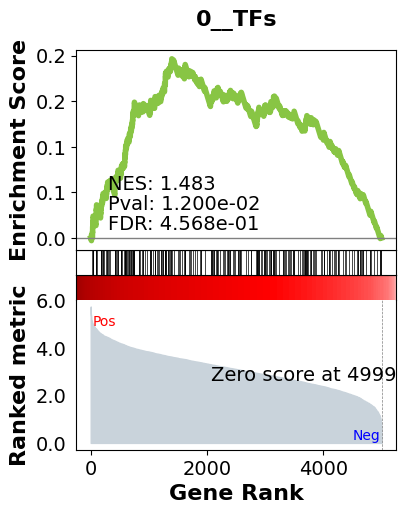

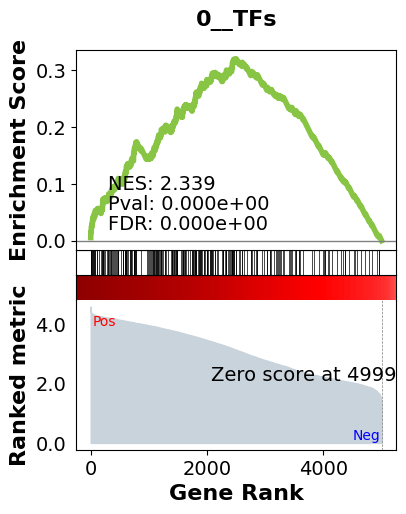

_________________________________________
TF specific enrichment
found some significant results for  47.36842105263158 % TFs

_________________________________________
loading GT,  omnipath
intersection of 2300 genes
intersection pct: 0.46
precision:  0.00202242941165346 
recall:  0.99981301421092 
random precision: 0.002022807647937667


 98%|█████████▊| 126/128 [00:03<00:00, 37.41it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:855: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:03<00:00, 36.96it/s]


Average Precision (AP):  0.0021818776362149263
Area Under Precision-Recall Curve (AUPRC):  0.0021632713054194983
EPR: 0.8313816060041002


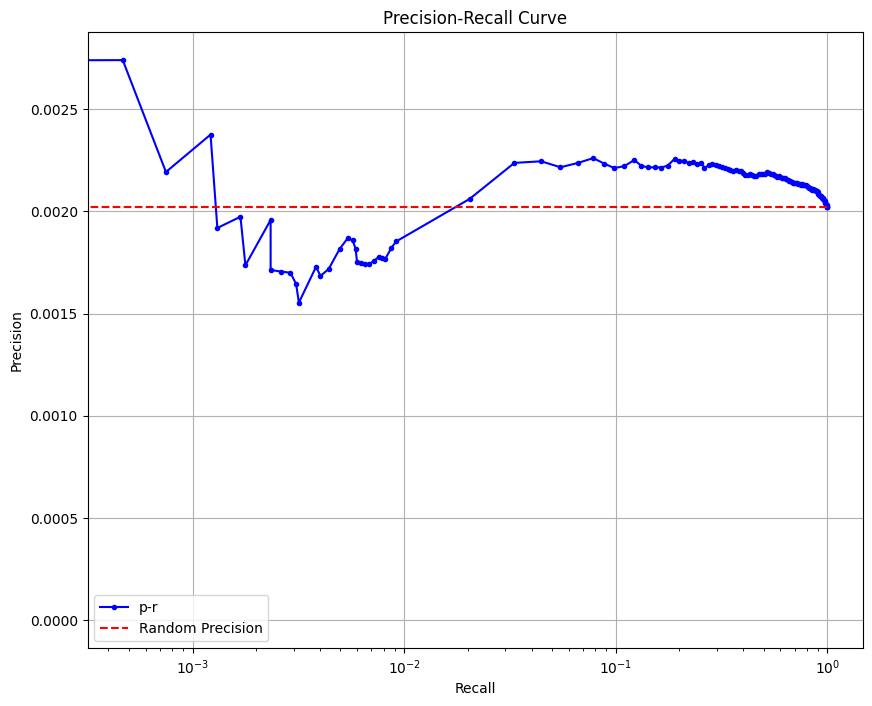

base enrichment
Top central genes: []


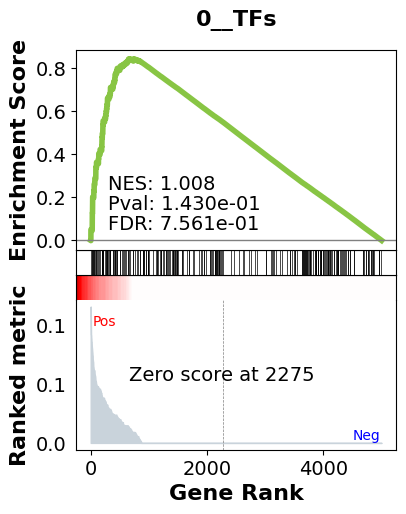

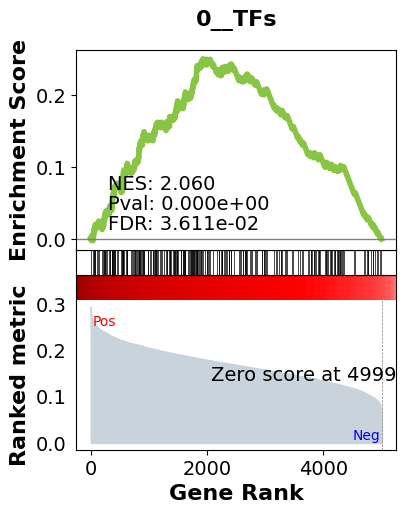

_________________________________________
TF specific enrichment
found some significant results for  7.894736842105263 % TFs

_________________________________________
loading GT,  omnipath
intersection of 2300 genes
intersection pct: 0.46
precision:  0.011307278725512978 
recall:  0.5322550486163051 
random precision: 0.002022807647937667


 97%|█████████▋| 124/128 [00:03<00:00, 34.66it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:855: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:03<00:00, 34.52it/s]


Average Precision (AP):  0.007597587935189993
Area Under Precision-Recall Curve (AUPRC):  0.007156698991478353
EPR: 4.6428402977694505


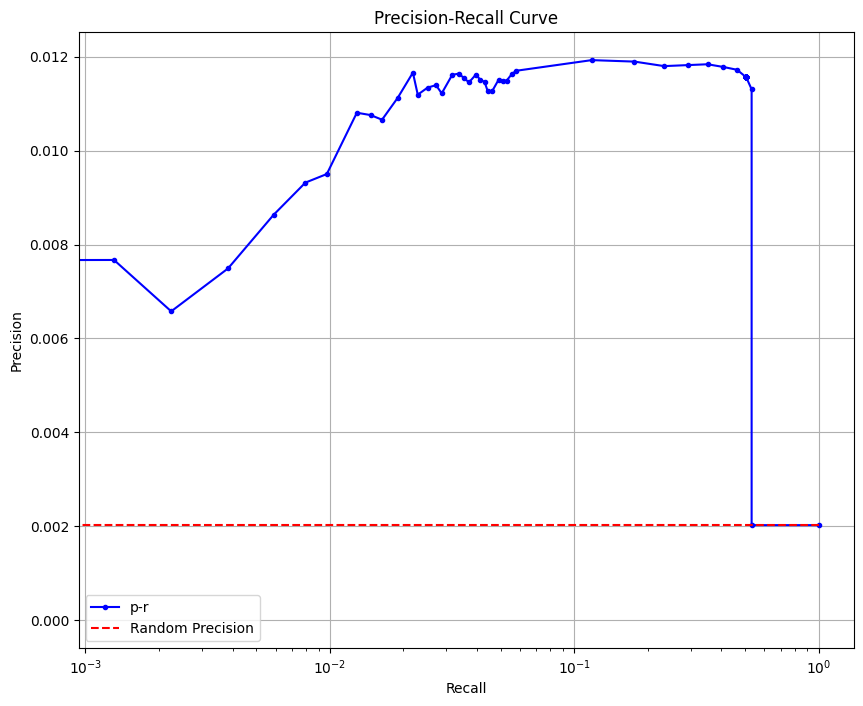

(34132, 70263)
zA4
save dir exist


/home/ml4ig1/Documents code/scPRINT/notebooks/../tools/DeepSEM/src/DeepSEM_cell_type_test_specific_GRN_model.py:55: RuntimeWarning: divide by zero encountered in divide
  data_values = (data_values - means) / (stds)
/home/ml4ig1/Documents code/scPRINT/notebooks/../tools/DeepSEM/src/DeepSEM_cell_type_test_specific_GRN_model.py:55: RuntimeWarning: invalid value encountered in divide
  data_values = (data_values - means) / (stds)


epoch: 1 0.7402135729789734 mse_loss: 0.7148580551147461 kl_loss: 0.02505240950267762 sparse_loss: 0.00030307756969705224
epoch: 2 0.740567147731781 mse_loss: 0.7154509425163269 kl_loss: 0.024774936493486166 sparse_loss: 0.00034126400714740157
epoch: 4 0.5417088270187378 mse_loss: 0.5152222514152527 kl_loss: 0.026110735721886158 sparse_loss: 0.00037581702054012567
epoch: 5 0.5238361656665802 mse_loss: 0.4971567690372467 kl_loss: 0.026259562117047608 sparse_loss: 0.0004198539099888876
epoch: 7 0.3309844434261322 mse_loss: 0.30223143100738525 kl_loss: 0.028293928364291787 sparse_loss: 0.0004590969911077991
epoch: 8 0.2992294877767563 mse_loss: 0.26946160942316055 kl_loss: 0.02926539327017963 sparse_loss: 0.000502487673657015
epoch: 10 0.20072297006845474 mse_loss: 0.16855315119028091 kl_loss: 0.03163342364132404 sparse_loss: 0.0005363932868931442
epoch: 11 0.1889856979250908 mse_loss: 0.15550503134727478 kl_loss: 0.03291172767058015 sparse_loss: 0.0005689275276381522
epoch: 13 0.14472488

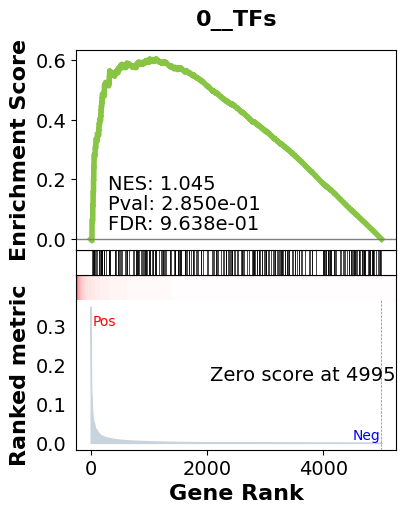

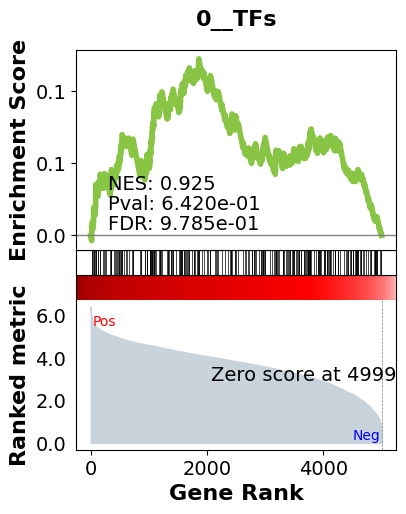

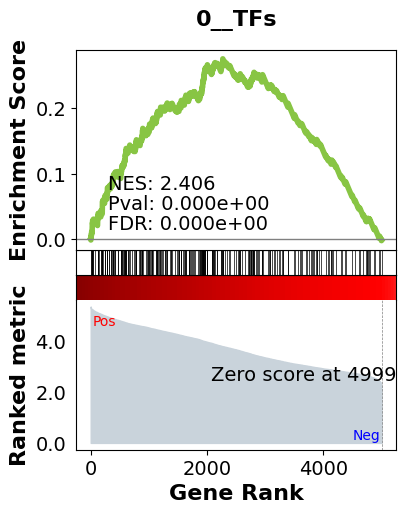

_________________________________________
TF specific enrichment
found some significant results for  63.888888888888886 % TFs

_________________________________________
loading GT,  omnipath
intersection of 2245 genes
intersection pct: 0.449
precision:  0.001249756837337081 
recall:  1.0 
random precision: 0.001249756837337081


 98%|█████████▊| 125/128 [00:02<00:00, 41.49it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:855: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:03<00:00, 41.73it/s]


Average Precision (AP):  0.0013881140513482674
Area Under Precision-Recall Curve (AUPRC):  0.0013876958949936
EPR: 0.6348679162863606


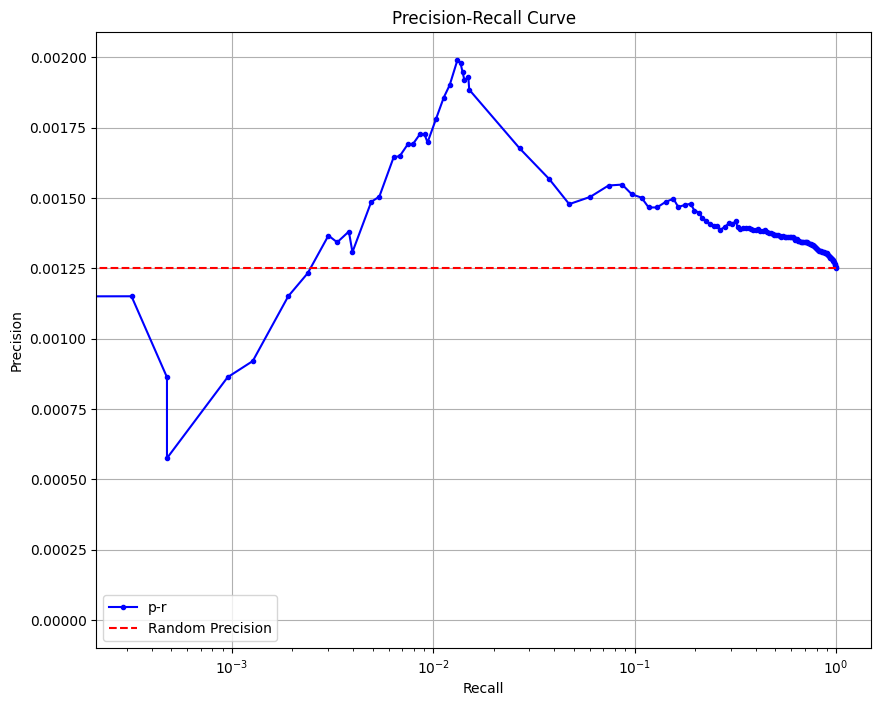

base enrichment
Top central genes: []


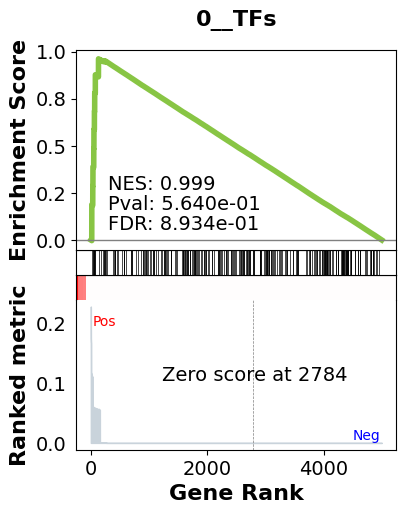

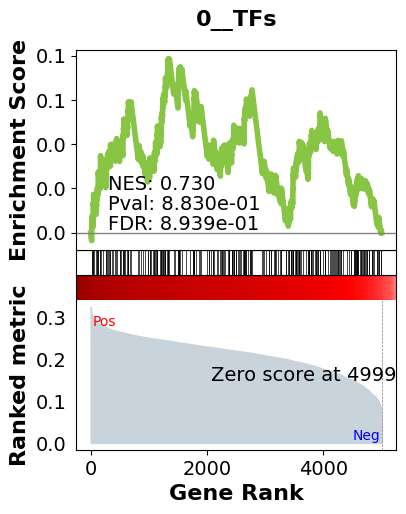

_________________________________________
TF specific enrichment
found some significant results for  2.7777777777777777 % TFs

_________________________________________
loading GT,  omnipath
intersection of 2245 genes
intersection pct: 0.449
precision:  0.00617631422584983 
recall:  0.5019059720457433 
random precision: 0.001249756837337081


 97%|█████████▋| 124/128 [00:02<00:00, 45.27it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:855: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 50.26it/s]


Average Precision (AP):  0.0045096748148657495
Area Under Precision-Recall Curve (AUPRC):  0.00404459111816151
EPR: 6.83354555885228


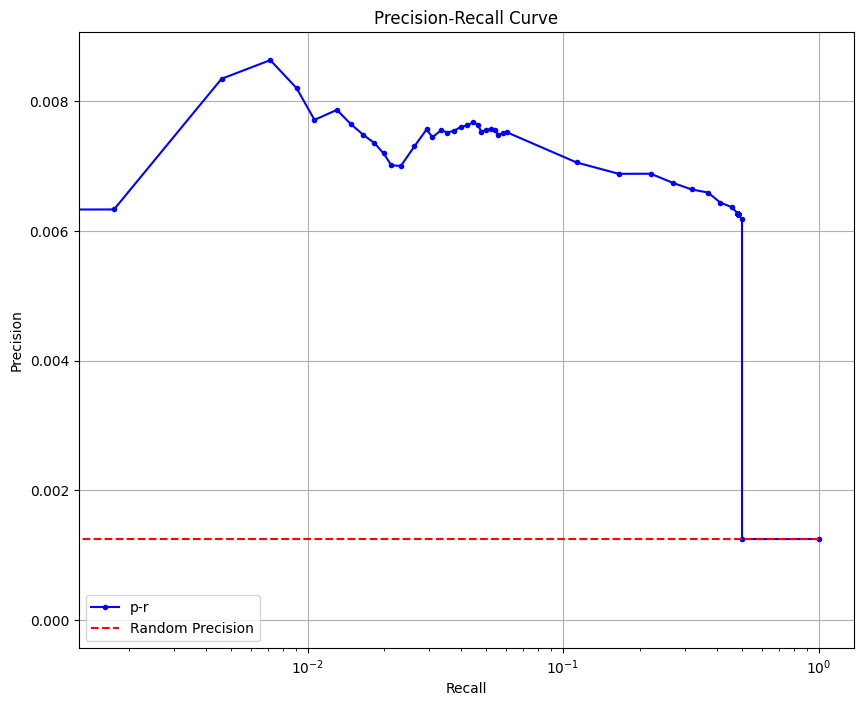

In [9]:
sc.tl.rank_genes_groups(
    adata, groupby="cell_type"
)
adata.var['ensembl_id'] = adata.var.index
adata = adata[adata.X.sum(1) > 500]
shapes = []
print(adata.shape)
metrics = {}
for celltype in CELLTYPES:
    to_use = adata.uns["rank_genes_groups"]["names"][celltype][
        : NUM_GENES
    ].tolist()
    subadata = adata[adata.obs.cell_type == celltype][:MAXCELLS,  adata.var.index.isin(to_use)].copy()
    print(adata.shape)
    grn = run_deepsem(subadata)
    grn.var.index = make_index_unique(
        grn.var['symbol'].astype(str))
    print(celltype, grn.shape)
    metrics['deepsem_'+celltype] = BenGRN(grn,
                                            do_auc=True, doplot=True).scprint_benchmark()
    grn.varp["GRN"][~grn.var.isTF, :] = 0
    metrics['genie3_'+celltype] = BenGRN(grn,
                                         do_auc=True, doplot=True).scprint_benchmark()
    shapes.append(grn.shape[1])

In [ ]:
shapes

[5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]

In [10]:
metrics

{'deepsem_pigmented ciliary epithelial cell': {'TF_enr': True,
  'enriched_terms_Targets': ['0__TFs',
   'celltype.gmt__Podocytes',
   'celltype.gmt__Hepatic stellate cells',
   'celltype.gmt__Endometrium',
   'celltype.gmt__Melanocytes',
   'celltype.gmt__Lymphatic Endothelial cells',
   'celltype.gmt__Pancreatic progenitor cells'],
  'significant_enriched_TFtargets': 26.666666666666668,
  'precision': 0.0009638206117976746,
  'recall': 0.9998211731044349,
  'rand_precision': 0.0009639929996731526,
  'auprc': 0.0009826206684557387,
  'ap': 0.0009828770798556434,
  'epr': 0.18521504061465777},
 'genie3_pigmented ciliary epithelial cell': {'TF_enr': False,
  'significant_enriched_TFtargets': 0.0,
  'precision': 0.0043363639060275275,
  'recall': 0.4182761087267525,
  'rand_precision': 0.0009639929996731526,
  'auprc': 0.002383534891456262,
  'ap': 0.0025039104636340784,
  'epr': 4.4819782996432815},
 'deepsem_fibroblast': {'enriched_terms_Central': ['celltype.gmt__Odontoblasts',
   'cel

In [11]:
False
True
True
True
True
True
True
False
True
True
True
True
False
False
False
False
True
True


True

In [12]:
res = []
for k, v in metrics.items():
    res.append([k.split('_')[-1], v['epr'], v['auprc'], v['rand_precision'], v['significant_enriched_TFtargets'], v.get('TF_enr', False), 'tf_' in k])

df = pd.DataFrame(res, columns=['name','EPR', 'AUPRC', 'RAND', 'TF_targ', 'TF_enr', 'TF_only'])
df

,name,EPR,AUPRC,RAND,TF_targ,TF_enr,TF_only
0,pigmented ciliary epithelial cell,0.185215,0.000983,0.000964,26.666667,True,False
1,pigmented ciliary epithelial cell,4.481978,0.002384,0.000964,0.000000,False,False
2,fibroblast,1.190767,0.002106,0.001930,31.034483,True,False
3,fibroblast,6.015491,0.007664,0.001930,0.000000,False,False
4,Schwann cell,1.745768,0.001282,0.001118,57.142857,True,False
5,Schwann cell,6.617564,0.003624,0.001118,0.000000,False,False
6,non-pigmented ciliary epithelial cell,1.619685,0.000873,0.000869,12.121212,False,False
7,non-pigmented ciliary epithelial cell,4.558214,0.001843,0.000869,9.090909,False,False
8,ciliary muscle cell,0.434446,0.000823,0.000810,29.411765,True,False
9,ciliary muscle cell,3.492774,0.001468,0.000810,2.941176,False,False
